## Preamble

In [2]:
import os
os.chdir('/nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/WeakLensingDeblending')

In [3]:
%matplotlib inline 
import os 

import mycode.tomo.tomo_fncs as tomo_fncs
import mycode.errors as errors
import mycode.preamble as preamble

import pickle 
from tqdm import tqdm 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import subprocess 
from scipy import linalg
import scipy 
from astropy.table import Table
from importlib import reload
import galsim 




In [7]:
from importlib import reload
reload(tomo_fncs)
reload(errors)

<module 'mycode.errors' from '/nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/WeakLensingDeblending/mycode/errors.py'>

In [8]:
%run mycode/preamble.py

In [9]:
scats = pickle.load(open('mycode/tomo/project1/selection_cats1.p', 'rb') ,encoding='latin1')

In [10]:
#important. 
tomos = np.linspace(0.2, 1.2, 6)
print(tomos)

[0.2 0.4 0.6 0.8 1.  1.2]


# Load some new coatalogues 

## Default step size

In [11]:
file_names = [f'final_fitsLSST{i}' for i in range(1,10)]
main_catsLSST = [] 
for key in file_names:
    results = fits.open(files[key])
    main_catsLSST.append(get_non_duplicated_cat(Table.read(results,hdu=1))) #assume not many objects are duplicated/bad.
    print('reading {}'.format(key))

reading final_fitsLSST1
reading final_fitsLSST2
reading final_fitsLSST3
reading final_fitsLSST4
reading final_fitsLSST5
reading final_fitsLSST6
reading final_fitsLSST7
reading final_fitsLSST8
reading final_fitsLSST9


## Step size of .001 

In [12]:
file_names = [f'final_fitsLSST{i}_ss1' for i in range(1,10)]
main_catsLSST_ss1 = [] 
for key in file_names:
    results = fits.open(files[key])
    main_catsLSST_ss1.append(get_non_duplicated_cat(Table.read(results,hdu=1))) #assume not many objects are duplicated/bad.
    print('reading {}'.format(key))

reading final_fitsLSST1_ss1
reading final_fitsLSST2_ss1
reading final_fitsLSST3_ss1
reading final_fitsLSST4_ss1
reading final_fitsLSST5_ss1
reading final_fitsLSST6_ss1
reading final_fitsLSST7_ss1
reading final_fitsLSST8_ss1
reading final_fitsLSST9_ss1


### Clean and obtain cats 

In [11]:
filters = [good,best]

zero_shear_cat = main_catsLSST_ss1[4]

scats_ss1 = selection_filter(main_catsLSST_ss1, filters, zero_shear_cat)

In [15]:
[len(scats_ss1[i]) for i in range(len(scats_ss1))]

[115951, 115951, 115951, 115951, 115951, 115951, 115951, 115951, 115951]

In [16]:
[len(scats[i]) for i in range(len(scats))]

[118946, 118946, 118946, 118946, 118946, 118946, 118946, 118946, 118946]

# Sanity Checks

In [9]:
tomo_cats = pickle.load(open('mycode/tomo/project1/tomo_cats.p', 'rb') ,encoding='latin1')

In [8]:
bootstrap_selection_cats = errors.bootstrap_zero_cats(scat)

AttributeError: module 'mycode.errors' has no attribute 'bootstrap_zero_cats'

In [29]:
bcats = bootstrap_selection_cats

In [28]:
print(len(bcat[4]))
print(len(set(bcat[4]['db_id'])))
print(len(scat[4]))

118946
75277
118946


In [79]:
bcat = pickle.load(open('mycode/tomo/project1/boot1/boot_cats0.p', 'rb') ,encoding='latin1')

In [30]:
tomos = np.linspace(0.2, 1.2, 6)
print(tomos)

[0.2 0.4 0.6 0.8 1.  1.2]


In [31]:
btomo_cats = tomo_fncs.get_tomographic_cats(bcats, tomos)

In [85]:
len(btomo_cats)

6

In [34]:
btomo_errs = tomo_fncs.get_tomo_errs(btomo_cats, 10)

just to check that symmetry is respected print both percentiles: [1.51004464e-06 1.84551245e-06]
just to check that symmetry is respected print both percentiles: [2.36053786e-06 8.38296819e-07]
just to check that symmetry is respected print both percentiles: [1.50620318e-06 1.29572077e-07]
just to check that symmetry is respected print both percentiles: [4.01365476e-07 3.40970735e-07]
just to check that symmetry is respected print both percentiles: [1.29701688e-07 3.70712179e-07]
just to check that symmetry is respected print both percentiles: [5.06323317e-07 4.97648803e-07]
just to check that symmetry is respected print both percentiles: [6.95442477e-07 2.33727264e-06]
just to check that symmetry is respected print both percentiles: [1.84977307e-06 2.79993405e-06]
just to check that symmetry is respected print both percentiles: [1.93435608e-06 1.20334880e-06]
just to check that symmetry is respected print both percentiles: [3.64998901e-06 4.22369027e-06]
just to check that symmetry is

just to check that symmetry is respected print both percentiles: [4.47171798e-06 1.81393558e-05]
just to check that symmetry is respected print both percentiles: [1.44547166e-05 2.15117168e-05]
just to check that symmetry is respected print both percentiles: [3.18552661e-05 2.38930497e-05]
just to check that symmetry is respected print both percentiles: [2.31583280e-05 3.03682135e-05]
just to check that symmetry is respected print both percentiles: [1.73222528e-05 1.52825086e-05]
just to check that symmetry is respected print both percentiles: [5.39312547e-06 3.26050208e-05]
just to check that symmetry is respected print both percentiles: [1.31316451e-05 2.97434861e-06]
just to check that symmetry is respected print both percentiles: [2.18414608e-05 1.46707415e-05]
just to check that symmetry is respected print both percentiles: [1.57313951e-05 1.86931563e-05]


In [41]:
tomo_bmatrices = tomo_fncs.get_tomo_bootstrap_matrices(btomo_cats, 10)

In [42]:
tomo_ms = pickle.load(open('mycode/tomo/project1/tomo_ms.p','rb'),encoding='latin1')

In [43]:
tomo_ms

([0.0002599601303981426,
  0.0005569660548470946,
  0.0011077809956607054,
  0.0016638360502035446,
  0.0026129817614199973,
  0.0058945198910100305],
 [2.9981868727718423e-05,
  4.53079198506729e-05,
  6.934118148871255e-05,
  0.00011679529329752248,
  0.00016170029733189364,
  0.00018238917213600004],
 [0.0010476207310946592,
  0.0019020117051156073,
  0.0031304445922458166,
  0.004093672785214046,
  0.005695759726218237,
  0.009881579124719535],
 [9.021477025262397e-05,
  0.00012159852556230094,
  0.00018645752480468076,
  0.00024243393674526327,
  0.0003545678470818871,
  0.0003051653102399658])

In [48]:
btomo_ms

([0.00027768237847019124,
  0.0006005110715687015,
  0.0007365400490418158,
  0.00180974922739186,
  0.002487294406591699,
  0.005583093731103019],
 [1.3651305102924096e-05,
  2.969517668286621e-05,
  4.03307056374221e-05,
  0.00010650674638656815,
  0.00012596768368127495,
  5.0690708491966e-05],
 [0.0011306481700044113,
  0.001710959820786864,
  0.0037219488588215105,
  0.004363313686128037,
  0.006009869424715693,
  0.010852920205727755],
 [3.269248587571383e-05,
  7.485098173382512e-05,
  6.550967228888167e-05,
  5.596335978619645e-05,
  8.906576746449193e-05,
  0.0001450203099967032])

In [47]:
btomo_ms = tomo_fncs.get_tomo_multp_bias(g1s,btomo_cats,btomo_errs,tomo_bmatrices)

In [49]:
boot_ms1 = pickle.load(open('mycode/tomo/project1/boot1/tomo_ms0.p','rb'),encoding='latin1')

In [88]:
boot_ms1

([0.000249434642790716,
  0.0005564309949856086,
  0.0010677947629957134,
  0.0015098892227335947,
  0.0026554915572313286,
  0.006004636915580806],
 [2.5748848018970886e-05,
  5.221349455832461e-05,
  6.946232701312969e-05,
  0.00012721432454271435,
  0.00017326756070330495,
  0.00020280422297082342],
 [0.0010394963547907493,
  0.0018615066630022175,
  0.0031315627212491403,
  0.00406242629318449,
  0.005766363442627494,
  0.009843724806707527],
 [8.789623123046175e-05,
  0.00011433142714857191,
  0.0001836527961576169,
  0.00025348264568627606,
  0.0003515870374068086,
  0.00032224098056493795])

In [23]:
zero_cat = tomo_cats[3][4]


14881

In [86]:
[len(btomo_cats[3][i]) for i in range(len(btomo_cats[3]))]

[14976, 14976, 14976, 14976, 14976, 14976, 14976, 14976, 14976]

In [30]:
[len(tomo_scat[4][i]) for i in range(len(tomo_cats[3]))]

[13378, 13378, 13378, 13378, 13378, 13378, 13378, 13378, 13378]

In [65]:
r1 = scat[3][1]
r2 = scat[3][2]
L = [] 
L.append(r1)
L.append(r2)



In [41]:
tabl = scat[4]

In [62]:
from astropy.table import Table

In [68]:
data_rows = [r1, r1, r2]

In [71]:
t = Table(rows=data_rows, names = r1.colnames)

In [72]:
t

db_id,grp_id,grp_size,grp_rank,visible,xmin,xmax,ymin,ymax,f_disk,f_bulge,dx,dy,z,ab_mag,ri_color,flux,sigma_m,sigma_p,e1,e2,a,b,beta,psf_sigm,purity,snr_sky,snr_iso,snr_grp,snr_isof,snr_grpf,ds,dg1,dg2,ds_grp,dg1_grp,dg2_grp,hsm_sigm,hsm_e1,hsm_e2,g1_fit,g2_fit,bias_f,bias_s,bias_g1,bias_g2,bias_x,bias_y,bias_f_grp,bias_s_grp,bias_g1_grp,bias_g2_grp,bias_x_grp,bias_y_grp,match,ambig_blend
int64,int64,int16,int16,int16,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,bool
402701802864,402701802864,2,0,1,1472,1492,1149,1165,0.96989685,0.03010317,-1503.4873,-1568.5226,1.3208928,24.01268,0.44771576,176553.19,0.2335915,0.3683858,0.6501468,0.061360687,0.5098659,0.107018314,0.047050502,0.70922434,0.9975201,50.380623,49.849895,49.849636,33.43276,29.520973,0.30636373,0.30128992,0.06463244,0.3101455,0.30504367,0.0690235,0.4146121,0.9530725,0.09075689,0.0,0.0,147.27847,-0.12933187,0.17199393,0.016146481,2.3222081e-07,1.48592e-07,-1139.3351,-0.14560275,0.16826472,0.023008056,0.0036794727,-0.0005645357,2367,False
402701802864,402701802864,2,0,1,1472,1492,1149,1165,0.96989685,0.03010317,-1503.4873,-1568.5226,1.3208928,24.01268,0.44771576,176553.19,0.2335915,0.3683858,0.6501468,0.061360687,0.5098659,0.107018314,0.047050502,0.70922434,0.9975201,50.380623,49.849895,49.849636,33.43276,29.520973,0.30636373,0.30128992,0.06463244,0.3101455,0.30504367,0.0690235,0.4146121,0.9530725,0.09075689,0.0,0.0,147.27847,-0.12933187,0.17199393,0.016146481,2.3222081e-07,1.48592e-07,-1139.3351,-0.14560275,0.16826472,0.023008056,0.0036794727,-0.0005645357,2367,False
402701209559,402701209559,3,0,1,1578,1608,1203,1225,0.8316719,0.16832809,-1481.2999,-1557.1577,1.3187922,23.731413,0.749424,228761.23,0.6078632,0.64540774,0.22735979,-0.09037851,0.78030086,0.47353232,-0.18918036,0.88060796,0.9995194,44.271732,43.97223,43.972225,25.312687,25.16228,0.05804345,0.046670914,0.042441823,0.05838648,0.046734724,0.042689502,0.5712182,0.4099952,-0.16310744,0.0,0.0,321.74005,-0.0016573475,0.0015023111,-0.0005890501,-5.288905e-08,9.381858e-08,162.34163,-0.0027134616,0.0014230643,1.1975723e-05,9.835238e-05,-6.869234e-05,2229,False


In [66]:
r1

db_id,grp_id,grp_size,grp_rank,visible,xmin,xmax,ymin,ymax,f_disk,f_bulge,dx,dy,z,ab_mag,ri_color,flux,sigma_m,sigma_p,e1,e2,a,b,beta,psf_sigm,purity,snr_sky,snr_iso,snr_grp,snr_isof,snr_grpf,ds,dg1,dg2,ds_grp,dg1_grp,dg2_grp,hsm_sigm,hsm_e1,hsm_e2,g1_fit,g2_fit,bias_f,bias_s,bias_g1,bias_g2,bias_x,bias_y,bias_f_grp,bias_s_grp,bias_g1_grp,bias_g2_grp,bias_x_grp,bias_y_grp,match,ambig_blend
int64,int64,int16,int16,int16,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,bool
402701802864,402701802864,2,0,1,1472,1492,1149,1165,0.96989685,0.03010317,-1503.4873,-1568.5226,1.3208928,24.01268,0.44771576,176553.19,0.2335915,0.3683858,0.6501468,0.061360687,0.5098659,0.107018314,0.047050502,0.70922434,0.9975201,50.380623,49.849895,49.849636,33.43276,29.520973,0.30636373,0.30128992,0.06463244,0.3101455,0.30504367,0.0690235,0.4146121,0.9530725,0.09075689,0.0,0.0,147.27847,-0.12933187,0.17199393,0.016146481,2.3222081e-07,1.48592e-07,-1139.3351,-0.14560275,0.16826472,0.023008056,0.0036794727,-0.0005645357,2367,False


In [67]:
r2

db_id,grp_id,grp_size,grp_rank,visible,xmin,xmax,ymin,ymax,f_disk,f_bulge,dx,dy,z,ab_mag,ri_color,flux,sigma_m,sigma_p,e1,e2,a,b,beta,psf_sigm,purity,snr_sky,snr_iso,snr_grp,snr_isof,snr_grpf,ds,dg1,dg2,ds_grp,dg1_grp,dg2_grp,hsm_sigm,hsm_e1,hsm_e2,g1_fit,g2_fit,bias_f,bias_s,bias_g1,bias_g2,bias_x,bias_y,bias_f_grp,bias_s_grp,bias_g1_grp,bias_g2_grp,bias_x_grp,bias_y_grp,match,ambig_blend
int64,int64,int16,int16,int16,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,bool
402701209559,402701209559,3,0,1,1578,1608,1203,1225,0.8316719,0.16832809,-1481.2999,-1557.1577,1.3187922,23.731413,0.749424,228761.23,0.6078632,0.64540774,0.22735979,-0.09037851,0.78030086,0.47353232,-0.18918036,0.88060796,0.9995194,44.271732,43.97223,43.972225,25.312687,25.16228,0.05804345,0.046670914,0.042441823,0.05838648,0.046734724,0.042689502,0.5712182,0.4099952,-0.16310744,0.0,0.0,321.74005,-0.0016573475,0.0015023111,-0.0005890501,-5.288905e-08,9.381858e-08,162.34163,-0.0027134616,0.0014230643,1.1975723e-05,9.835238e-05,-6.869234e-05,2229,False


In [73]:
[len(cat) for cat in scat]

[118946, 118946, 118946, 118946, 118946, 118946, 118946, 118946, 118946]

In [74]:
print(len(scat[0]))
print(len(set(scat[0]['db_id'])))

118946
118946


In [50]:
g1s = [-.02,-.015,-.01,-.005,0.,.005,.01,.015,.02]

In [39]:
g1s[1:8]

[-0.015, -0.01, -0.005, 0.0, 0.005, 0.01, 0.015]

# New money plot with no fit on the last point. 

In [72]:
def linear_f_odr(B, x):
    return B[0]*x + B[1]

"""
This is the fit to use when assuming that all the points are not correlated. 
"""
def linear_fit(g1s,medians,fit_args): 
    import scipy.odr
    linear = scipy.odr.Model(linear_f_odr)
    mydata = scipy.odr.RealData(g1s, medians, sy=fit_args['errs'])
    myodr = scipy.odr.ODR(mydata, linear, beta0=[1.,2.])
    myoutput = myodr.run()
    #myoutput.pprint()
    beta0 = myoutput.beta[0]
    beta1 = myoutput.beta[1]
    
    return beta0, beta1, np.sqrt(myoutput.cov_beta[0,0]), np.sqrt(myoutput.cov_beta[1,1]), myoutput.cov_beta[0,1]/np.sqrt(myoutput.cov_beta[0,0]*myoutput.cov_beta[1,1])

# same as old money plot but ignoring points that are too far off at 0.02 and -0.02 
def small_get_money_plot(g1s,g1_or_g2,errs_grp,errs_iso,cats,fit_procedure, fit_args,ticks1=None, labely1=None):
    plt.rc('text', usetex=True)
    figure1 = plt.figure(figsize=(20, 20))

    ################################ BLENDED  ################################################

    means = [np.mean(cat['bias_{}_grp'.format(g1_or_g2)]) for cat in cats]
    medians = [np.median(cat['bias_{}_grp'.format(g1_or_g2)]) for cat in cats]
    
    # use the method describe in the page above for std of the median 
    fit_args['errs'] = errs_grp  #this line is only useful in the case of a linear fit not chi2. 

    ax = figure1.add_subplot(111)
    ax.errorbar(g1s,medians,yerr=errs_grp,marker='o',linestyle=' ',color='blue',capsize=3,label="\\rm Blending on" )
    
    fit_args['iso_or_grp'] = 'grp'
    beta0, beta1,beta0_err,beta1_err,beta01_corr = fit_procedure(g1s[1:8],medians[1:8], fit_args)

    #plot line, 
    x= g1s
    y = [beta0*g1 + beta1 for g1 in x]
    ax.plot(x[1:8],y[1:8],c='b')
    
    #plot dashed line in what remains. 
    ax.plot(x[0:2], y[0:2],c='b', linestyle='dashed')
    ax.plot(x[7:9], y[7:9],c='b', linestyle='dashed')

    print("Results for fits of blended case: ")
    print()


    #this first set of print statements are good for debugging. 
    print('means grp:', means)
    print()
    print('medians grp:',medians)
    print()
    print('errs grp:',errs_grp)
    print()

    print()
    print('value b0:     {:.3e}'.format(beta0))
    print('error b0:     {:.3e}'.format(beta0_err))
    print('value b1:     {:.3e}'.format(beta1) )
    print('error b1:     {:.3e}'.format(beta1_err))
    print('error correlation coefficient: {:.3e}'.format(beta01_corr))
    print()


    print() 
    print('###################################')

    ################################ UNBLENDED  ################################################

    means = [np.mean(cat['bias_{}'.format(g1_or_g2)]) for cat in cats]
    medians = [np.median(cat['bias_{}'.format(g1_or_g2)]) for cat in cats]
    # use the method describe in the page above for std of the median 
    fit_args['errs'] = errs_iso
    fit_args['iso_or_grp'] = 'iso'

    ax.errorbar(g1s,medians,yerr=errs_iso,marker='o',linestyle=' ',color='red',capsize=3, label = "\\rm Blending off")

    beta0, beta1,beta0_err,beta1_err,beta01_corr = fit_procedure(g1s[1:8],medians[1:8], fit_args)

    #plot line, 
    x = g1s
    y = [beta0*g1 + beta1 for g1 in x]
    ax.plot(x[1:8],y[1:8],c='r')
    
    #plot dashed line in what remains. 
    ax.plot(x[0:2], y[0:2],c='r', linestyle='dashed')
    ax.plot(x[7:9], y[7:9],c='r', linestyle='dashed')
    
#     #plot the second line for comparison that does not consider the correlations. 
#     #fit_args['errs'] = errs_iso
#     fit_args['errs'] = np.sqrt(np.diagonal(fit_args['cov_iso']))
#     beta0, beta1,beta0_err,beta1_err,beta01_corr = linear_fit(g1s[1:8],medians[1:8], fit_args)
#     x = g1s
#     y = [beta0*g1 + beta1 for g1 in x]
#     ax.plot(x[1:8],y[1:8],c='gray')


    #print useful debugging information. 
    print('means iso:',  means)
    print('medians iso:',medians)
    print('errs iso:', errs_iso)
    print()

    print()
    print('value b0 (multiplicative bias):     {:.3e}'.format(beta0))
    print('error b0:     {:.3e}'.format(beta0_err))
    print('value b1 (additive bias):     {:.3e}'.format(beta1) )
    print('error b1:     {:.3e}'.format(beta1_err))
    print('error correlation coefficient: {:.3e}'.format(beta01_corr))
    print()


    ################################################################################################
    #formatting 
    
    #plt.ylim(-10,10)
    #ax1.set_xlim([-.025,.025])


    ax.tick_params(axis='both', which='major', labelsize=40)

    # ax1.yticks(size=20)
    num = g1_or_g2[1:]

    ax.set_xlabel(r'$g_{}$'.format(num),size=40)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    
    if labely1 != None: 
        ax.get_yaxis().get_offset_text().set_size(1)
        ax.set_ylabel(r'\rm {}'.format(labely1),size=40)
    else: 
        ax.get_yaxis().get_offset_text().set_size(40)


    ax.axhline(0,c='g')

    ax.tick_params(axis='both', size=10,width=3,which='both')


    if ticks1 != None: 
        ax.set_yticklabels(ticks1)
    
        
    ax.legend(loc='best', prop={'size':35})

## Here is the definitive money plots 


In [75]:
g1s = [-.02,-.015,-.01,-.005,0.,.005,.01,.015,.02]

In [ ]:
#read boostrap matrices from file. 
boot_matrices = pickle.load(open('mycode/notebooks/paper/data/bootstrap_matrices_new_shears.p','rb'), encoding='latin1')
boot_covariance_matrix_iso, boot_covariance_matrix_grp, boot_correlation_matrix_iso, boot_correlation_matrix_grp = boot_matrices

In [74]:
errs_LSST_iso = np.sqrt(np.diag(boot_covariance_matrix_iso[2:-2,2:-2]))
errs_LSST_grp = np.sqrt(np.diag(boot_covariance_matrix_grp[2:-2,2:-2]))

Results for fits of blended case: 

means grp: [-0.005725802, -0.104234904, 0.3667351, -0.008052083, 0.000104242616, -0.017771024, -0.011497866, -0.009707973, -0.07515411]

medians grp: [-7.7299155e-05, -5.386315e-05, -3.5307126e-05, -1.7741842e-05, -1.7578379e-06, 1.2734165e-05, 3.0312924e-05, 5.144745e-05, 7.524933e-05]

errs grp: [6.46030489e-06 5.40333677e-06 4.86357211e-06 4.02608416e-06
 3.17971791e-06 3.62227216e-06 4.56814593e-06 6.04199591e-06
 6.81989635e-06]


value b0:     3.368e-03
error b0:     9.240e-05
value b1:     -4.180e-06
error b1:     1.760e-06
error correlation coefficient: -1.303e-01


###################################
means iso: [-0.0046843835, -0.0036375287, -0.002592183, -0.0015476916, -0.00050333404, 0.0005415727, 0.0015865519, 0.002631363, 0.0036765877]
medians iso: [-3.64856e-05, -2.3287685e-05, -1.2499681e-05, -4.3368004e-06, 2.074546e-08, 5.755613e-06, 1.4133995e-05, 2.5396606e-05, 3.8534974e-05]
errs iso: [2.73211757e-06 2.33208342e-06 1.75869023e-06 

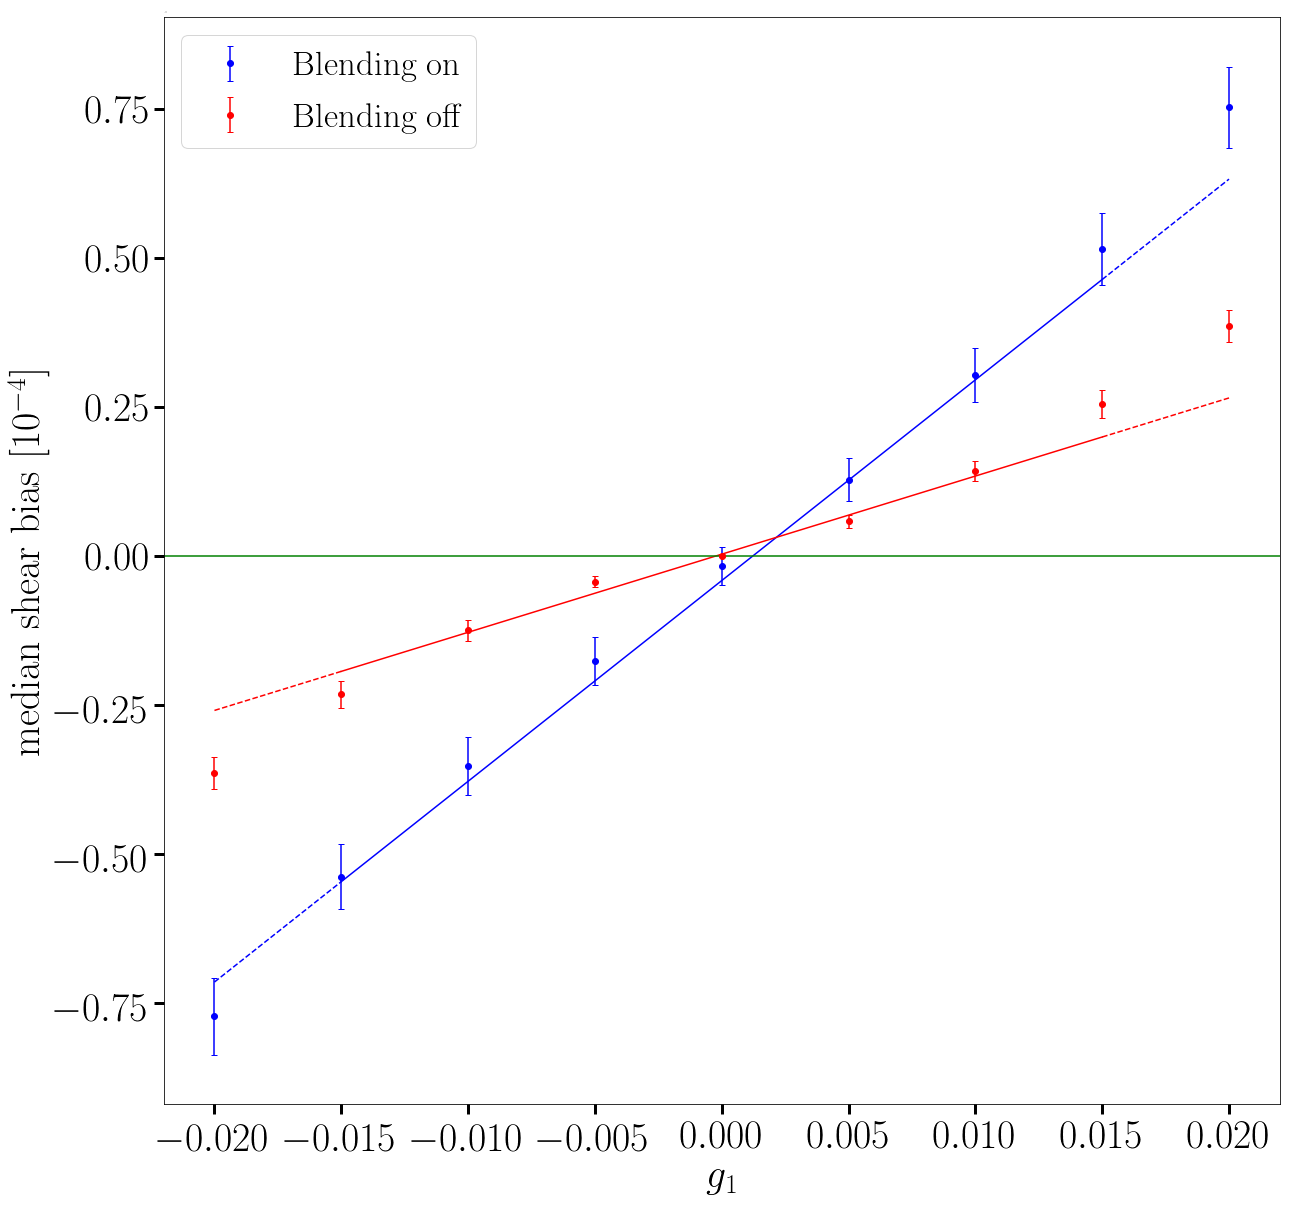

In [76]:
small_get_money_plot(g1s, 'g1', errs_LSST_grp, errs_LSST_iso,scats,errors.chi_sq_fit,{'cov_iso':boot_covariance_matrix_iso[3:-3,3:-3], 
             'cov_grp':boot_covariance_matrix_grp[3:-3,3:-3],'inv_iso':None,'inv_grp':None, 
              'model':errors.linear_f}, labely1='median shear bias $[10^{-4}]$')

## Look at some interesting regarding the covariances matrices 

In [34]:
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(round(y,2)), end="  ")
        print("")

In [35]:
matprint(boot_covariance_matrix_iso[2:-2,2:-2])

          0            0            0            0            0            0            0            0            0  
          0            0            0            0            0            0            0            0            0  
          0            0            0            0            0            0            0            0            0  
          0            0            0            0            0            0            0            0            0  
          0            0            0            0            0            0            0            0            0  
          0            0            0            0            0            0            0            0            0  
          0            0            0            0            0            0            0            0            0  
          0            0            0            0            0            0            0            0            0  
          0            0            0            0      

In [36]:
%precision 2 
matprint(boot_correlation_matrix_iso[2:-2,2:-2])

       1      0.98      0.95      0.92      0.84      0.85      0.82       0.8      0.78  
    0.98         1      0.97      0.94      0.84      0.87      0.84      0.82       0.8  
    0.95      0.97         1      0.96      0.87       0.9      0.86      0.85      0.83  
    0.92      0.94      0.96         1      0.85       0.9      0.86      0.85      0.84  
    0.84      0.84      0.87      0.85         1      0.91       0.9      0.86      0.84  
    0.85      0.87       0.9       0.9      0.91         1      0.97      0.95      0.92  
    0.82      0.84      0.86      0.86       0.9      0.97         1      0.97      0.95  
     0.8      0.82      0.85      0.85      0.86      0.95      0.97         1      0.98  
    0.78       0.8      0.83      0.84      0.84      0.92      0.95      0.98         1  


In [37]:
matprint(boot_correlation_matrix_grp[2:-2,2:-2])

       1      0.98      0.96      0.94      0.92       0.9      0.88      0.86      0.84  
    0.98         1      0.98      0.96      0.94      0.91      0.89      0.87      0.85  
    0.96      0.98         1      0.98      0.95      0.93      0.91      0.89      0.87  
    0.94      0.96      0.98         1      0.97      0.95      0.93       0.9      0.89  
    0.92      0.94      0.95      0.97         1      0.97      0.95      0.92      0.91  
     0.9      0.91      0.93      0.95      0.97         1      0.98      0.95      0.94  
    0.88      0.89      0.91      0.93      0.95      0.98         1      0.98      0.96  
    0.86      0.87      0.89       0.9      0.92      0.95      0.98         1      0.98  
    0.84      0.85      0.87      0.89      0.91      0.94      0.96      0.98         1  


In [9]:
errs_LSST_grp = errors.errs_param_boot(scats,'bias_g1_grp',10000, np.median) 
errs_LSST_iso = errors.errs_param_boot(scats,'bias_g1',10000, np.median) 

just to check that symmetry is respected print both percentiles: [5.99788473e-06 6.60956721e-06]
just to check that symmetry is respected print both percentiles: [5.75694139e-06 5.00142050e-06]
just to check that symmetry is respected print both percentiles: [4.77050155e-06 4.70198938e-06]
just to check that symmetry is respected print both percentiles: [4.24214340e-06 3.60958711e-06]
just to check that symmetry is respected print both percentiles: [3.25793712e-06 3.03212232e-06]
just to check that symmetry is respected print both percentiles: [3.68062229e-06 3.43608190e-06]
just to check that symmetry is respected print both percentiles: [4.57202077e-06 4.71675594e-06]
just to check that symmetry is respected print both percentiles: [5.70728473e-06 6.56810880e-06]
just to check that symmetry is respected print both percentiles: [6.44192914e-06 7.13840564e-06]
just to check that symmetry is respected print both percentiles: [2.57452120e-06 2.59637323e-06]
just to check that symmetry is

In [14]:
print(errs_LSST_grp)
print()
print(errs_LSST_iso)

[6.609567208215594e-06, 5.001420504413545e-06, 4.7019893827382475e-06, 3.6095871109864675e-06, 3.0321223221108085e-06, 3.436081897234544e-06, 4.716755938716233e-06, 6.568108801729977e-06, 7.138405635487288e-06]

[2.596373233245688e-06, 2.1194209693931043e-06, 1.7266820577788167e-06, 7.768226350890468e-07, 2.6621336246535066e-07, 1.1972315405728295e-06, 1.7529491742607206e-06, 2.4204277724493265e-06, 2.732744178501889e-06]


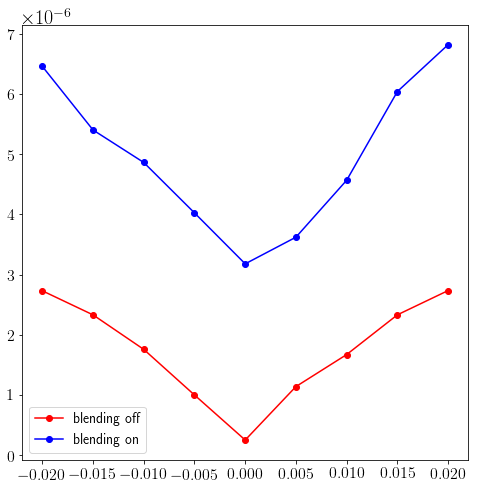

In [39]:
fig, ax = plt.subplots(figsize=(8,8))
ax.ticklabel_format(style='sci', axis='y', scilimits=(-0, 0))
ax.get_yaxis().get_offset_text().set_size(20)
ax.plot(g1s, np.sqrt(np.diagonal(boot_covariance_matrix_iso[2:-2,2:-2])), marker='o', c = 'r', label = 'blending off')
ax.plot(g1s, np.sqrt(np.diagonal(boot_covariance_matrix_grp[2:-2,2:-2])), marker='o', c = 'b', label = 'blending on')
ax.tick_params(axis='both', which='major', labelsize=16) 
plt.legend(loc='best', prop={'size':14}) 


## Looking at different histograms from the bootstraps 

In [19]:
medians1_iso = errors.bootstrap_param_cat(scats[3], 'bias_g1', 10000, np.median)
medians2_iso = errors.bootstrap_param_cat(scats[4], 'bias_g1', 10000, np.median)
medians3_iso = errors.bootstrap_param_cat(scats[5], 'bias_g1', 10000, np.median)

medians1_grp = errors.bootstrap_param_cat(scats[3], 'bias_g1_grp', 10000, np.median)
medians2_grp = errors.bootstrap_param_cat(scats[4], 'bias_g1_grp', 10000, np.median)
medians3_grp = errors.bootstrap_param_cat(scats[5], 'bias_g1_grp', 10000, np.median)

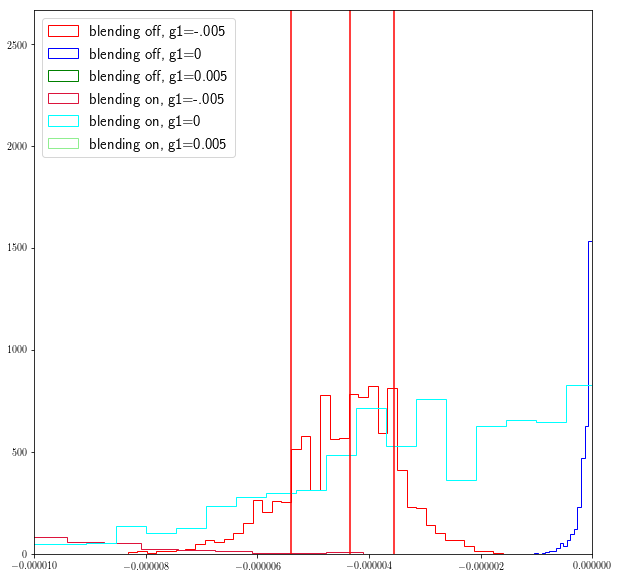

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(medians1_iso, bins = 50, histtype='step', label='blending off, g1=-.005', color= 'r')
ax.hist(medians2_iso, bins = 50, histtype='step', label='blending off, g1=0', color = 'b')
ax.hist(medians3_iso, bins = 50, histtype='step', label='blending off, g1=0.005', color = 'g')

ax.hist(medians1_grp, bins = 50, histtype='step', label='blending on, g1=-.005', color= 'crimson')
ax.hist(medians2_grp, bins = 50, histtype='step', label='blending on, g1=0', color = 'cyan')
ax.hist(medians3_grp, bins = 50, histtype='step', label='blending on, g1=0.005', color = 'lightgreen')

ax.axvline(np.percentile(medians1_iso, 84),c='r')
ax.axvline(np.percentile(medians1_iso, 50), c='r')
ax.axvline(np.percentile(medians1_iso, 16), c='r')


ax.set_xlim(-.00001,0)



plt.legend(loc='best', prop={'size':15})

In [29]:
l = list(range(1, 10 )) 
l[2:4]

[3, 4]

In [89]:
#bmedians_iso_ss1 = errors.bootstrap_param_cats(scats_ss1, 'bias_g1', 10000, np.median)
#medians2_iso = errors.bootstrap_param_cats(scats_ss1[4], 'bias_g1', 10000, np.median)
#medians3_iso = errors.bootstrap_param_cats(scats_ss1[5], 'bias_g1', 10000, np.median)

#pickle.dump( bmedians_iso_ss1 , open( "bmedians_iso_ss1.p", "wb" ) )

#bmedians_grp_ss1 = errors.bootstrap_param_cats(scats_ss1, 'bias_g1_grp', 10000, np.median)
#medians2_grp = errors.bootstrap_param_cats(scats_ss1[4], 'bias_g1_grp', 10000, np.median)
#medians3_grp = errors.bootstrap_param_cats(scats_ss1[5], 'bias_g1_grp', 10000, np.median)

#pickle.dump( bmedians_grp_ss1 , open( "bmedians_grp_ss1.p", "wb" ) )

bmedians_iso_ss1 = pickle.load( open("bmedians_iso_ss1.p", "rb" ))
bmedians_grp_ss1 = pickle.load( open("bmedians_grp_ss1.p", "rb" ))

(0, 2550)

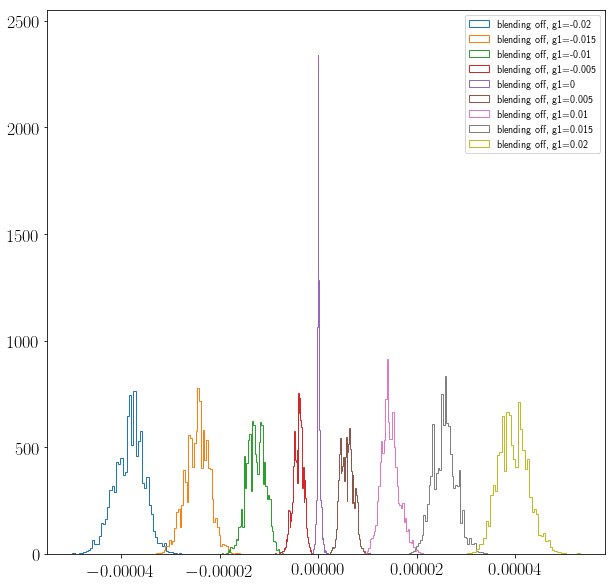

In [94]:
fig,ax = plt.subplots(figsize=(10,10))
for i,g, in enumerate(g1s):
    ax.hist(bmedians_iso_ss1[i], bins = 50, histtype='step', label=f'blending off, g1={g:.3g}')
ax.tick_params(axis='both', which='major', labelsize=18)
plt.legend(loc='best', prop={'size':10})

ax.set_ylim(0, 2550)


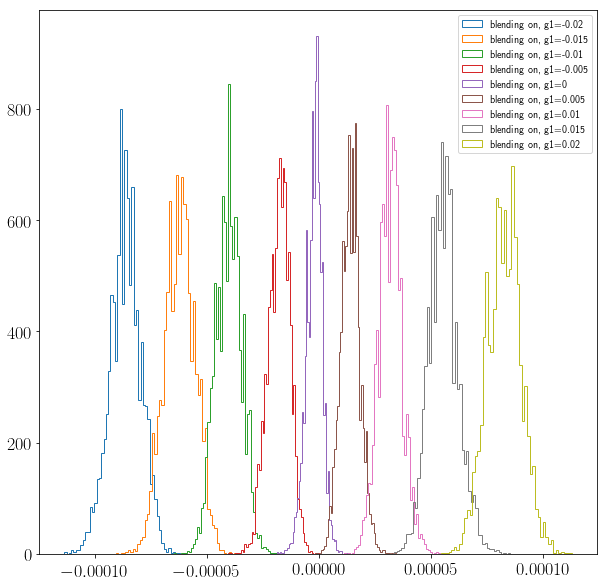

In [98]:
fig,ax = plt.subplots(figsize=(10,10))
for i,g, in enumerate(g1s):
    ax.hist(bmedians_grp_ss1[i], bins = 50, histtype='step', label=f'blending on, g1={g:.3g}')
ax.tick_params(axis='both', which='major', labelsize=18)
plt.legend(loc='best', prop={'size':10})

#ax.set_ylim(0, 1100)



In [ ]:
#### bmedians_iso1 = [] 
# bmedians_grp1 = [] 

# for i in range(len(scats)):
    
#     bmedians_iso1.append(errors.bootstrap_param_cat(scats[i], 'bias_g1', 10000, np.median))
#     bmedians_grp1.append(errors.bootstrap_param_cat(scats[i], 'bias_g1_grp', 10000, np.median))

# bmedians_iso2 = errors.bootstrap_param_cats(scats, 'bias_g1', 10000, np.median)
# bmedians_grp2 = errors.bootstrap_param_cats(scats, 'bias_g1_grp', 10000, np.median)

In [12]:
#dump them to not have to calculate them everytime. 

In [16]:
# pickle.dump( (bmedians_iso2, bmedians_grp2), open( "bmedians2.p", "wb" ) )

In [9]:
import pickle
g1s = np.linspace(-.02,0.02, 9)
bmedians_iso2, bmedians_grp2 = pickle.load( open("bmedians2.p", "rb" ))

In [88]:
len(bmedians_iso2[0])

10000

In [10]:
#read boostrap matrices from file. 
boot_matrices = pickle.load(open('mycode/notebooks/paper/data/bootstrap_matrices_new_shears.p','rb'), encoding='latin1')
boot_covariance_matrix_iso, boot_covariance_matrix_grp, boot_correlation_matrix_iso, boot_correlation_matrix_grp = boot_matrices

In [30]:
list(range(3,6))

[3, 4, 5]

In [29]:
g1s[3:6]

array([-0.005,  0.   ,  0.005])

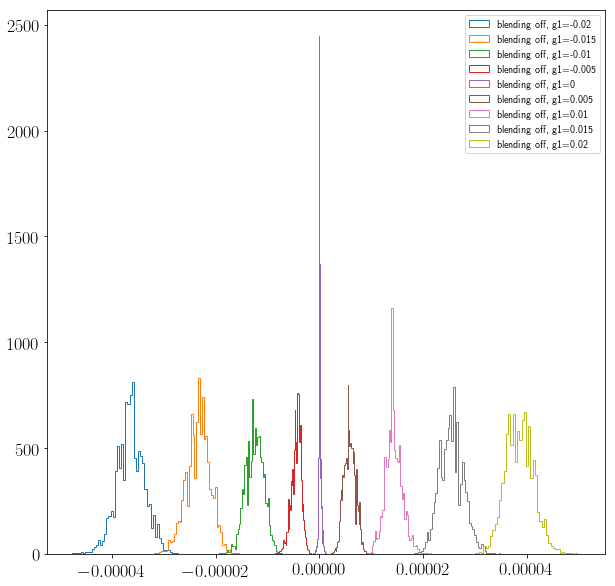

In [91]:
fig,ax = plt.subplots(figsize=(10,10))
for i,g, in enumerate(g1s):
    ax.hist(bmedians_iso2[i], bins = 50, histtype='step', label=f'blending off, g1={g:.3g}')
ax.tick_params(axis='both', which='major', labelsize=18)
plt.legend(loc='best', prop={'size':10})


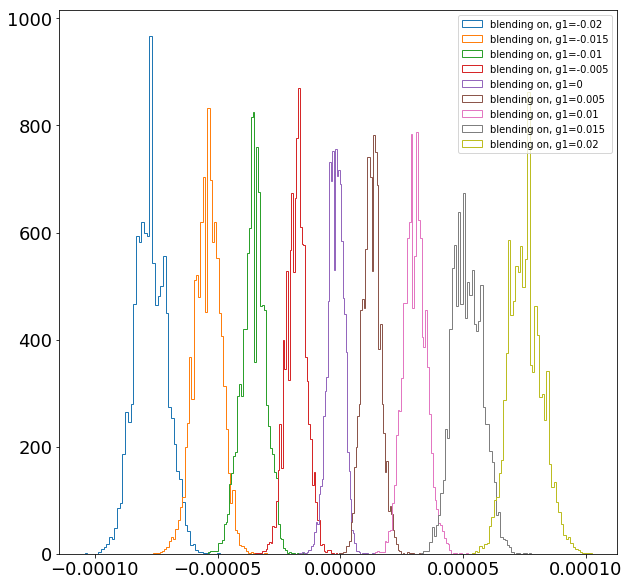

In [18]:
fig,ax = plt.subplots(figsize=(10,10))
for i,g, in enumerate(g1s):
    ax.hist(bmedians_grp2[i], bins = 50, histtype='step', label=f'blending on, g1={g:.3g}')
ax.tick_params(axis='both', which='major', labelsize=18)
plt.legend(loc='best', prop={'size':10})




## Why not triangle plot it ? 

In [21]:
def get_covs(arr1,arr2, true1,true2):
    assert len(arr1) == len(arr2), 'arrays are not the same size.'
    N = len(arr1)
    
    sigma1 = np.sqrt(np.sum((arr1 - true1)**2)/N) 
    sigma2 = np.sqrt(np.sum((arr2 - true2)**2)/N) 
    sigma12 = np.sqrt(np.sum((arr1 - true1) * (arr2 - true2)) / N)
    
    return sigma1, sigma2, sigma12, (sigma12**2/ (sigma1*sigma2))


(2.0816242e-06, 9.900632e-06)

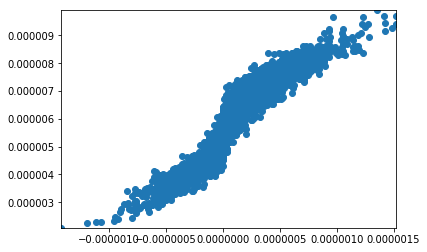

In [16]:
plt.scatter(bmedians_iso2[4],bmedians_iso2[5])
plt.xlim(min(bmedians_iso2[4]), max(bmedians_iso2[4]))
plt.ylim(min(bmedians_iso2[5]), max(bmedians_iso2[5]))

In [24]:
sigma1, sigma2, sigma12, rho12 = get_covs(np.array(bmedians_iso[4]), np.array(bmedians_iso[5]),
                                  np.median(scats[4]['bias_g1']),np.median(scats[5]['bias_g1']))
print(sigma1, sigma2, sigma12, rho12)

In [12]:
EXTENT_PULL = (-3, 3)
BINS_PULL = 50 

sboot_covariance_matrix_iso = boot_covariance_matrix_iso[2:-2,2:-2]
sboot_covariance_matrix_grp = boot_covariance_matrix_grp[2:-2,2:-2]

#scat medians 
scat_meds_iso = [np.median(scat['bias_g1']) for scat in scats ]
scat_meds_grp = [np.median(scat['bias_g1_grp']) for scat in scats ]


#obtain pulls 
pulls_iso = [(bmedians_iso2[i] - scat_meds_iso[i])/np.sqrt(sboot_covariance_matrix_iso[i,i]) for i in range(len(g1s))]
pulls_grp = [(bmedians_grp2[i] - scat_meds_grp[i])/np.sqrt(sboot_covariance_matrix_grp[i,i]) for i in range(len(g1s))]





In [113]:
print(np.mean(bmedians_iso2[4]))
np.median(scats[4]['bias_g1'])

7.90139e-08


2.074546e-08

In [13]:
#obtain predictions to put in triangle plot 
from importlib import reload
from scipy.stats import norm
import corner 
reload(corner)


def errorEllipseCor(centroid, cor_xy, alpha=1.52):
    """
    Return a correlation ellipse according to Dan Coe paper arxiv.0906.4123.

    We use correlations instead of covariances for the ellipses because most of
    the parameters in our models have dimensions.
    Confidence level by default is 68.3% -> alpha = 1.52 according to the same
    paper.

    Args:
        centroid(:py:tuple): Position of the center of the ellipse in
                             (x,y) form.

    Returns:
        An mpatch.Ellipse object
    """
    import matplotlib.patches as mpatch

    a = 1 + cor_xy
    b = 1 - cor_xy
    theta = 45
    width = 2 * alpha * a
    height = 2 * alpha * b

    ellipse = mpatch.Ellipse(xy=centroid, width=width, height=height,
                             angle=theta, edgecolor='r', fc='None', lw=2)

    return ellipse




def triangle_prediction(g1s,boot_matrix, means, num_points):
    """Draws a triangle shaped plot with the prediction for 68% confidence level"""

    predict_fig = plt.figure(figsize=(11, 11)) #this is the figure containing the fisher predictions. 
    normalized_area = (EXTENT_PULL[1] - EXTENT_PULL[0]) * (num_points / BINS_PULL)
    color_hist = 'red'
    dim = len(g1s)
    
    for i,g_i in enumerate(g1s):
        for j,g_j in enumerate(g1s):  
            if i < dim and j < dim:
                    sigma_i = np.sqrt(boot_matrix[i,i])
                    sigma_j = np.sqrt(boot_matrix[j, j])
                    mean = (means[j] / sigma_j,means[i] / sigma_i)
                    cor_xy = boot_matrix[j, i]

                    if i == j:
                        sigma_gauss = 1 #normalize normal pdf.
                        x = np.linspace(EXTENT_PULL[0], EXTENT_PULL[1], 1000)
                        ax = predict_fig.add_subplot(dim, dim, dim * i + j + 1)
                        ax.plot(x, normalized_area * norm.pdf(x, mean[0],sigma_gauss),color=color_hist)
                    
                    
#                     sigma_fisher = round(sigma_i, SIG_DIGITS)
#                         sigma_fits = round(res_stds[param_i], SIG_DIGITS)

#                         #error of bias_fits
#                         sigma_1 = round(sigma_fits / math.sqrt(number_fits),SIG_DIGITS)
#                         #error of sigma_fits
#                         sigma_2 = round(sigma_fits / math.sqrt(2*number_fits), SIG_DIGITS)
#                         bias_fisher = round(fish.biases[param_i],SIG_DIGITS)
#                         bias_fits = round(biases[param_i],SIG_DIGITS)
                        
#                         if i == 4 or i==5: 
#                             data = (
#                                   r'\begin{eqnarray*}' +
#                                   r'\sigma_{\rm F}' + '&=&' +
#                                   '{:+.4f}'.format(sigma_fisher) +
#                                   r'\\' +
#                                   r'\sigma_{\rm fit}' + '&=&' +
#                                   '{:+.4f}'.format(sigma_fits) +
#                                   r'\pm' +
#                                   '{:.4f}'.format(sigma_2) +
#                                   r'\\' +
#                                   r'b_{F}' + '&=&' +
#                                   '{:+.4f}'.format(bias_fisher) +
#                                   r'\\' +
#                                   r'b_{\rm fit}' + '&=&' +
#                                   '{:+.4f}'.format(bias_fits) +
#                                   r'\pm' +
#                                   '{:.4f}'.format(sigma_1) +
#                                   r'\end{eqnarray*}')
                        
#                         else: 
#                             data = (
#                                   r'\begin{eqnarray*}' +
#                                   r'\sigma_{\rm F}' + '&=&' +
#                                   '{:.4f}'.format(sigma_fisher) +
#                                   r'\\' +
#                                   r'\sigma_{\rm fit}' + '&=&' +
#                                   '{:.4f}'.format(sigma_fits) +
#                                   r'\pm' +
#                                   '{:.4f}'.format(sigma_2) +
#                                   r'\\' +
#                                   r'b_{F}' + '&=&' +
#                                   '{:+.4f}'.format(bias_fisher) +
#                                   r'\\' +
#                                   r'b_{\rm fit}' + '&=&' +
#                                   '{:+.4f}'.format(bias_fits) +
#                                   r'\pm' +
#                                   '{:.4f}'.format(sigma_1) +
#                                   r'\end{eqnarray*}')


#                         ax.text(1.725, .35, data,
#                                 transform=ax.transAxes, ha='center',
#                                 fontsize=10,
#                                 fontweight='bold')



                    elif i > j:
                        # draw an error_ellipse in off-diagonals axises.
                        ellip = errorEllipseCor(mean, cor_xy)
                        ax = predict_fig.add_subplot(dim, dim,
                                                     dim * i + j + 1)
                        ax.add_patch(ellip)

#                         ax.axhline(y=pull_mins[param_i], color='g')
#                         ax.axhline(y=pull_maxs[param_i], color='g')
# #                         ax.axhline(y=mean[1], color='y')


#                         ax.axvline(x=pull_mins[param_j], color='g')
#                         ax.axvline(x=pull_maxs[param_j], color='g')
# #                         ax.axvline(x=mean[0], color='y')

                    else:
                        ax = predict_fig.add_subplot(dim,
                                                     dim,
                                                     dim * i + j + 1)
    plt.rc('text', usetex=True)
    return predict_fig


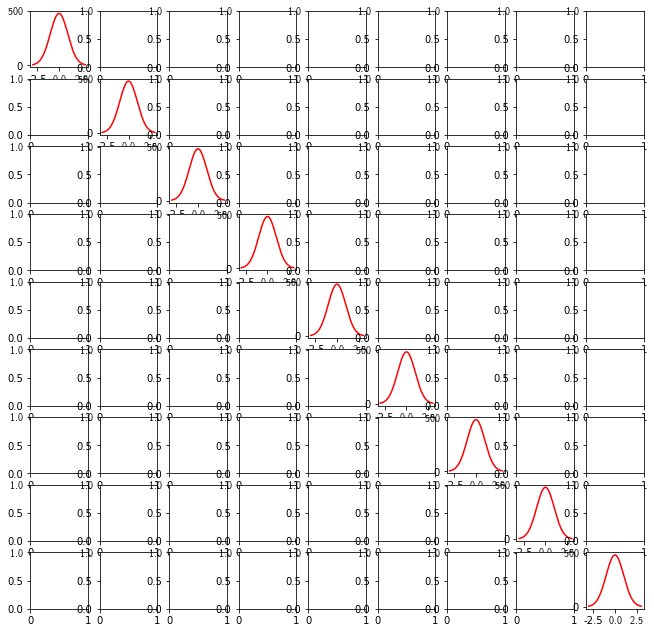

In [14]:
pred_fig = triangle_prediction(g1s, sboot_covariance_matrix_iso,  [0]*len(g1s), len(pulls_iso[0]))

In [16]:
#put the things in the correct format. 
data_iso = np.zeros((len(pulls_iso[4]),len(g1s)))
data_grp = np.zeros((len(pulls_grp[4]),len(g1s)))
for i in range(len(g1s)):
    data_iso[:,i] = pulls_iso[i]
    data_grp[:,i] = pulls_grp[i]

In [11]:
#put the things in the correct format for data. 
data_iso = np.zeros((len(bmedians_iso2[4]),len(g1s)))
data_grp = np.zeros((len(bmedians_grp2[4]),len(g1s)))
for i in range(len(g1s)):
    data_iso[:,i] = bmedians_iso2[i]
    data_grp[:,i] = bmedians_grp2[i]

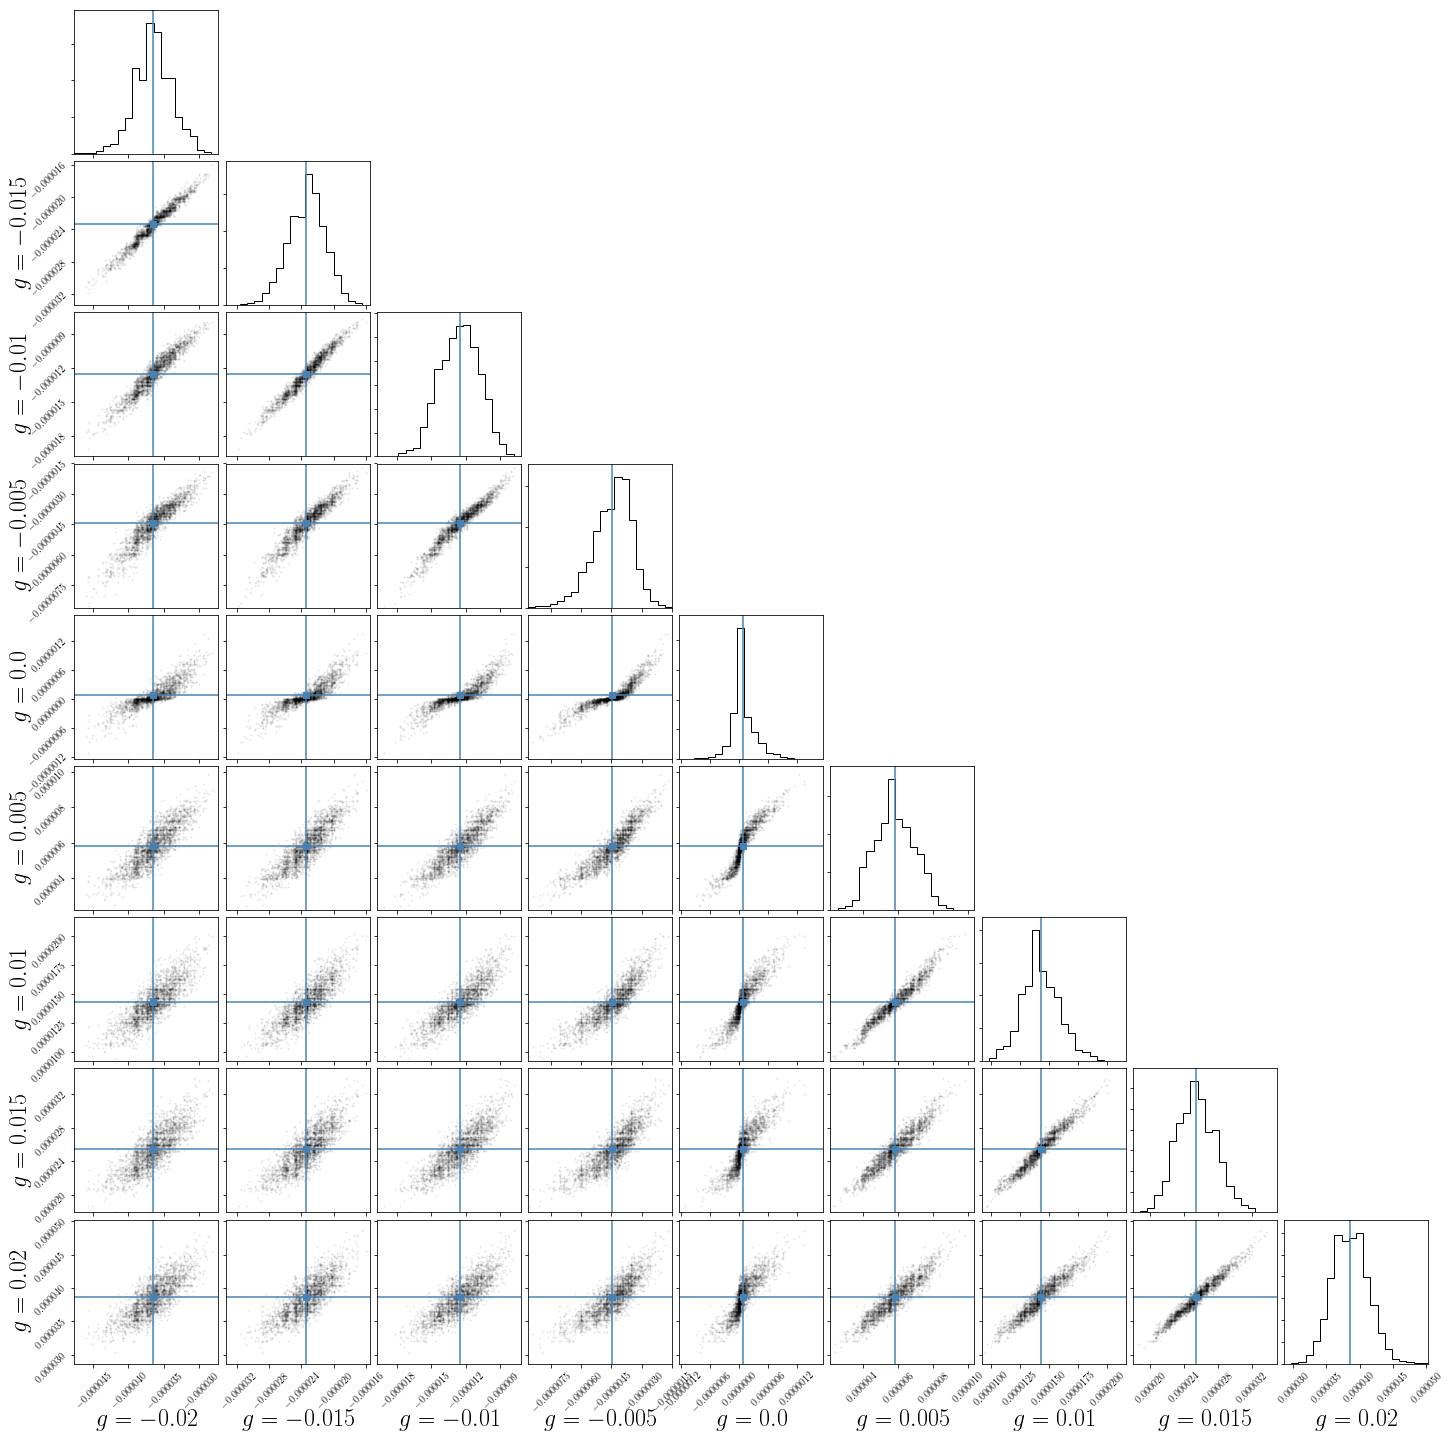

In [14]:
####### normal data 
import corner 
plt.rc('text', usetex=True)
ndim = len(g1s)
hist2d_kwargs = {'plot_datapoints':True,'plot_density':False,'plot_contours':False, 
                     'no_fill_contours':False,'fill_contours':False, 'data_kwargs': {'alpha':0.1, 'markevery':4}  }
fig = corner.corner(data_iso, 
              truths=[np.mean(bmedians_iso2[i]) for i in range(len(g1s))], 
              show_titles=False, 
              labels =[f"$g={round(g1,3)}$" for g1 in g1s],
              title_kwargs={"fontsize": 24},label_kwargs={"fontsize": 24}, 
              **hist2d_kwargs  )

axes = np.array(fig.axes).reshape(ndim, ndim)

#Loop over the histograms
for i in range(ndim):
    for j in range(ndim):
        ax = axes[i,j]
        ax.xaxis.set_tick_params(labelsize=10)
        ax.yaxis.set_tick_params(labelsize=10)



# fig.set_figheight(12)
# fig.set_figwidth(12)
#plt.savefig('triangle.pdf')

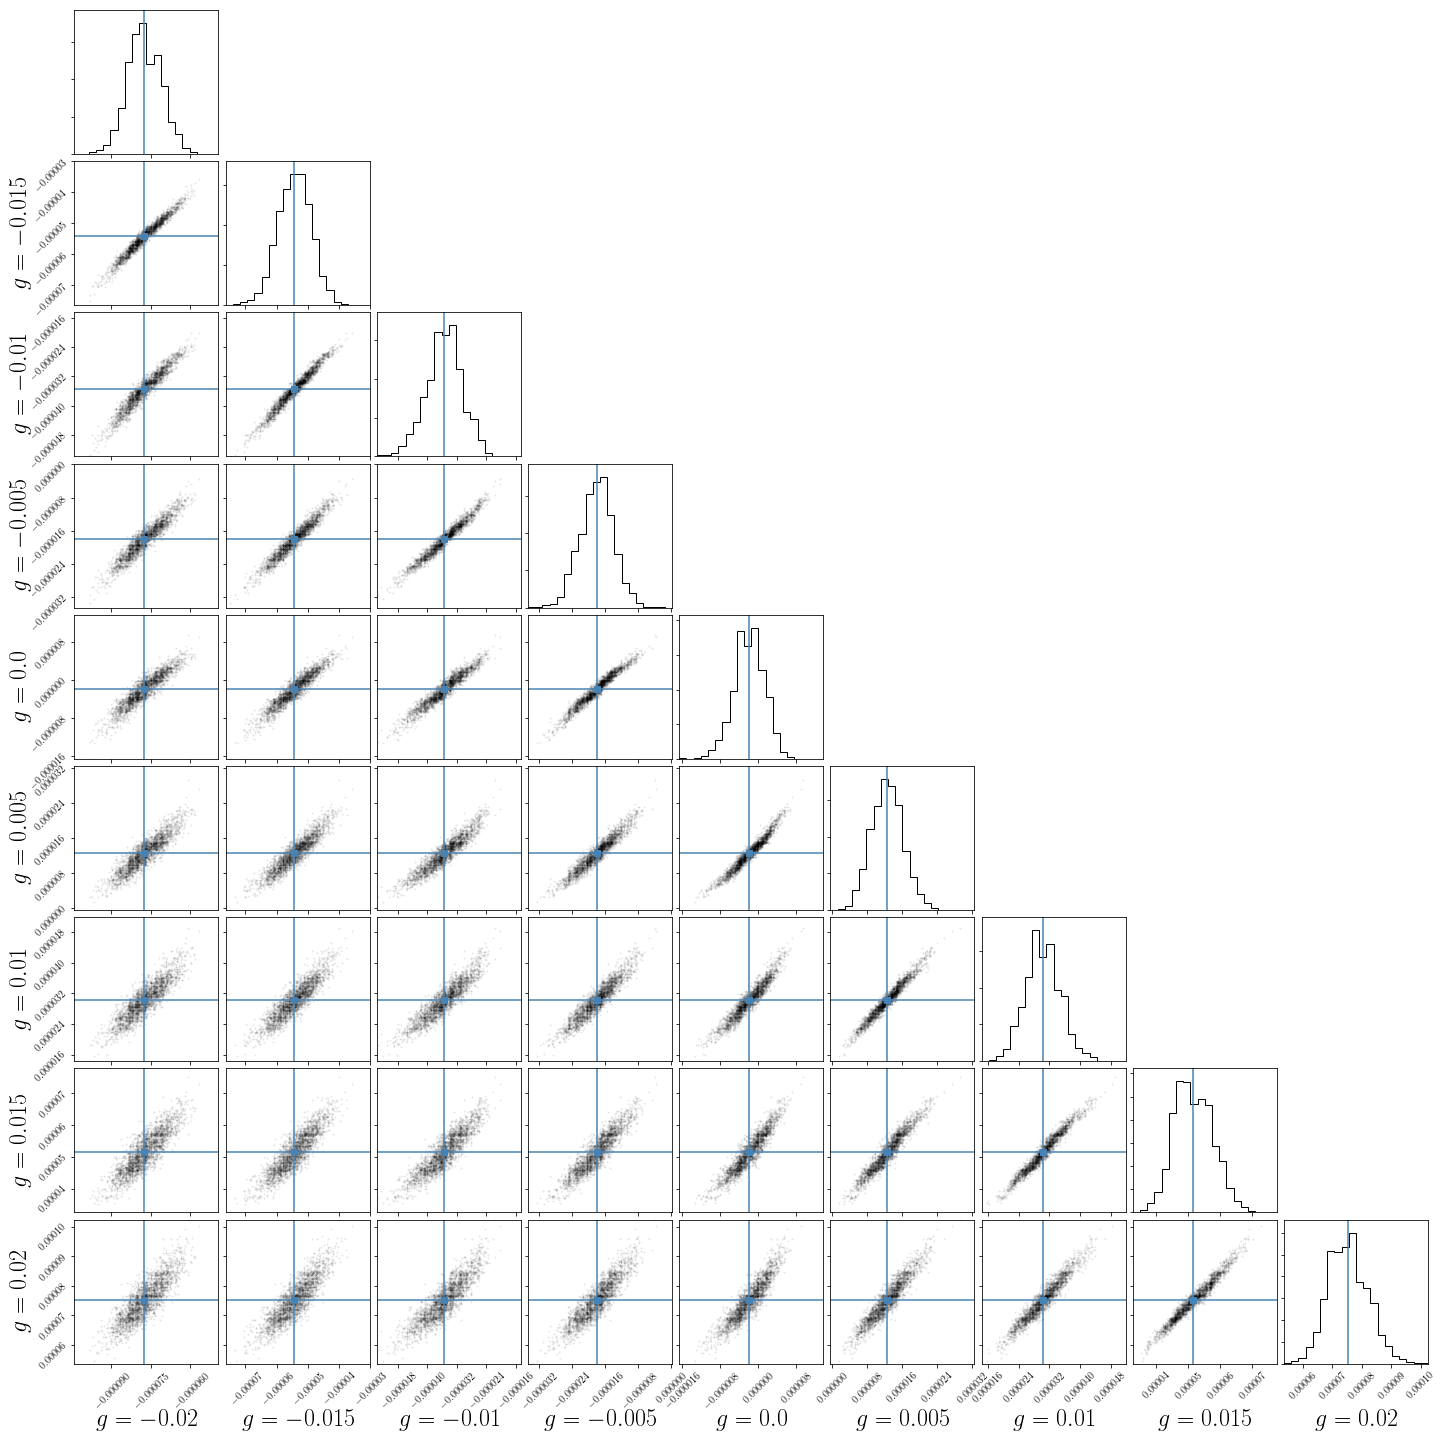

In [15]:
####### normal data 
import corner 
plt.rc('text', usetex=True)
ndim = len(g1s)
hist2d_kwargs = {'plot_datapoints':True,'plot_density':False,'plot_contours':False, 
                     'no_fill_contours':False,'fill_contours':False, 'data_kwargs': {'alpha':0.1, 'markevery':4}  }
fig = corner.corner(data_grp, 
              truths=[np.mean(bmedians_grp2[i]) for i in range(len(g1s))], 
              show_titles=False, 
              labels =[f"$g={round(g1,3)}$" for g1 in g1s],
              title_kwargs={"fontsize": 24},label_kwargs={"fontsize": 24}, 
              **hist2d_kwargs  )

axes = np.array(fig.axes).reshape(ndim, ndim)

#Loop over the histograms
for i in range(ndim):
    for j in range(ndim):
        ax = axes[i,j]
        ax.xaxis.set_tick_params(labelsize=10)
        ax.yaxis.set_tick_params(labelsize=10)



# fig.set_figheight(12)
# fig.set_figwidth(12)
#plt.savefig('triangle.pdf')

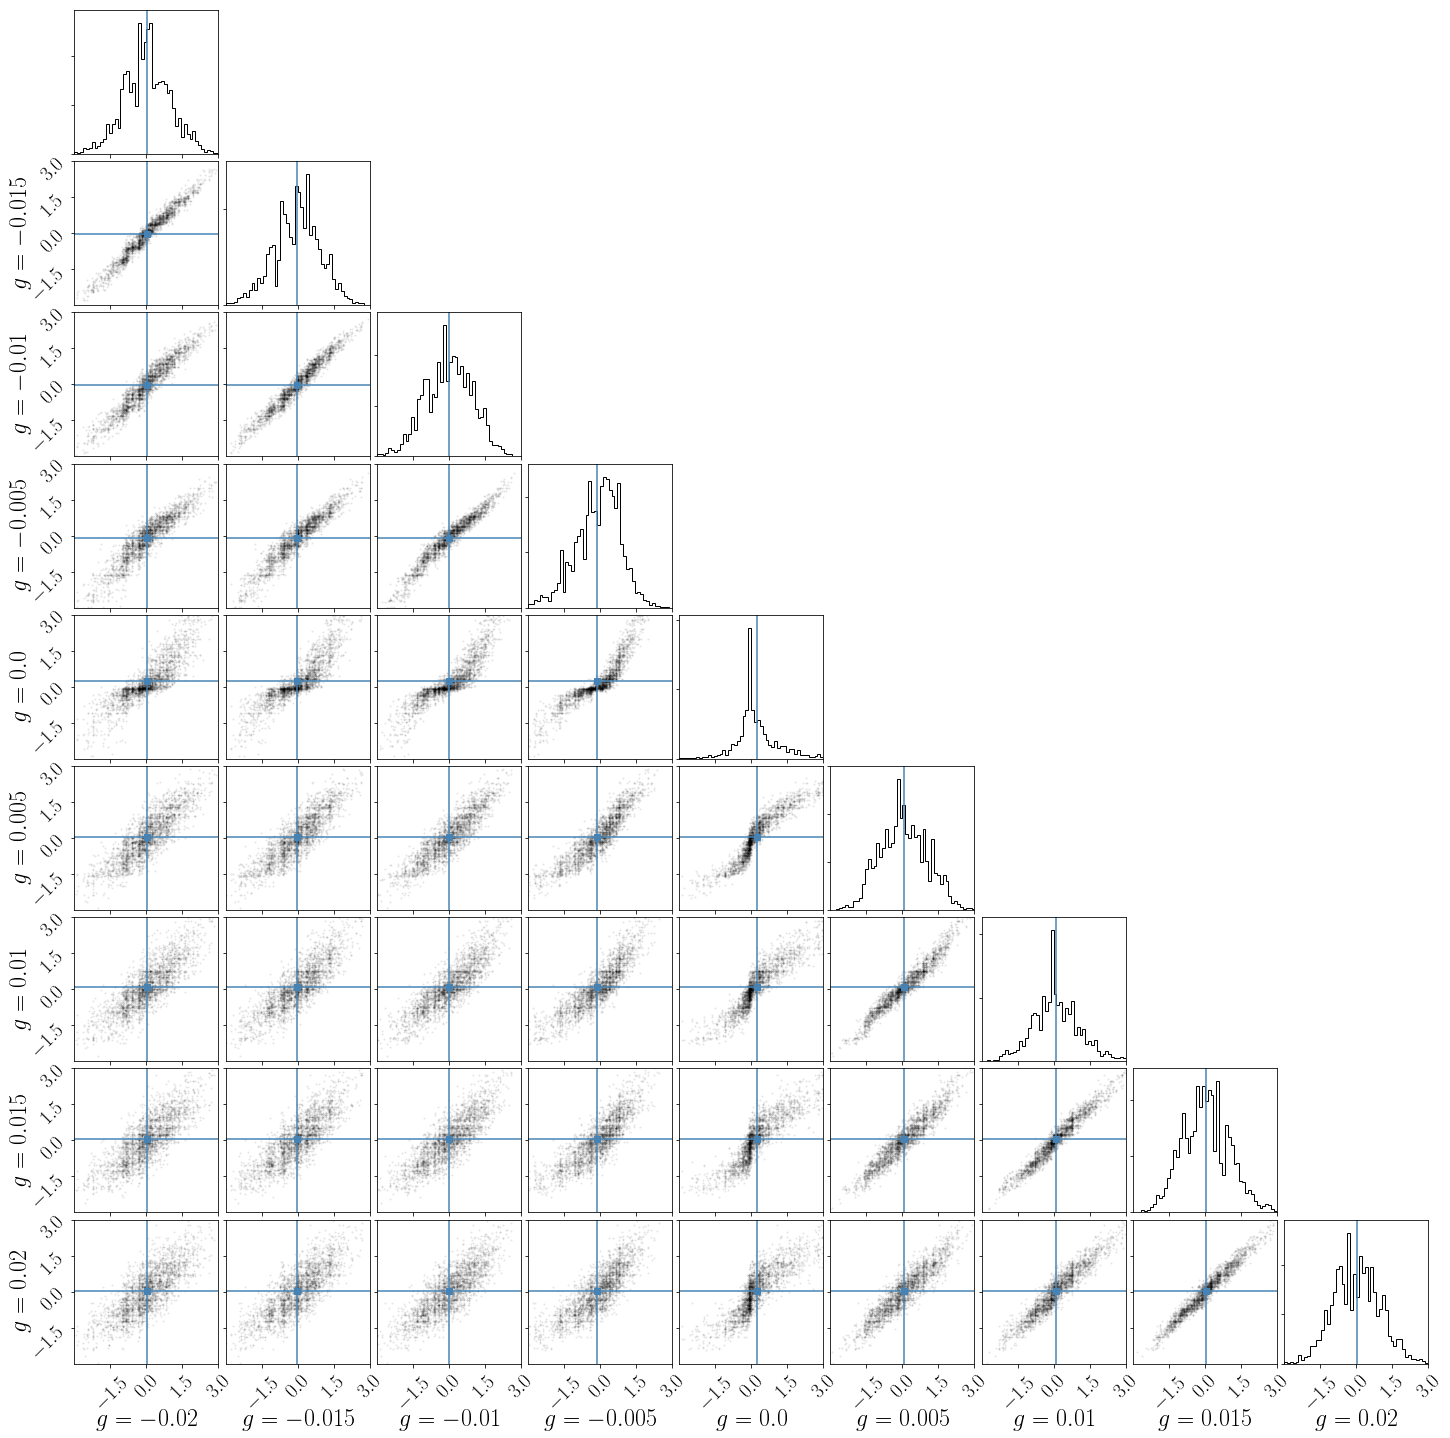

In [19]:
######### pulls format 
import corner 
plt.rc('text', usetex=True)
ndim = len(g1s)
hist2d_kwargs = {'plot_datapoints':True,'plot_density':False,'plot_contours':False, 
                     'no_fill_contours':False,'fill_contours':False, 'data_kwargs': {'alpha':0.1, 'markevery':4}  }
fig = corner.corner(data_iso, 
              bins=BINS_PULL, 
              truths=[np.mean(pulls_iso[i]) for i in range(len(g1s))], 
              range=[EXTENT_PULL]*len(g1s), 
              show_titles=False, 
              labels =[f"$g={round(g1,3)}$" for g1 in g1s],
              title_kwargs={"fontsize": 24},label_kwargs={"fontsize": 24}, 
              **hist2d_kwargs  )

axes = np.array(fig.axes).reshape(ndim, ndim)

#Loop over the histograms
for i in range(ndim):
    for j in range(ndim):
        ax = axes[i,j]
        ax.xaxis.set_tick_params(labelsize=20)
        ax.yaxis.set_tick_params(labelsize=20)



# fig.set_figheight(12)
# fig.set_figwidth(12)
#plt.savefig('triangle.pdf')

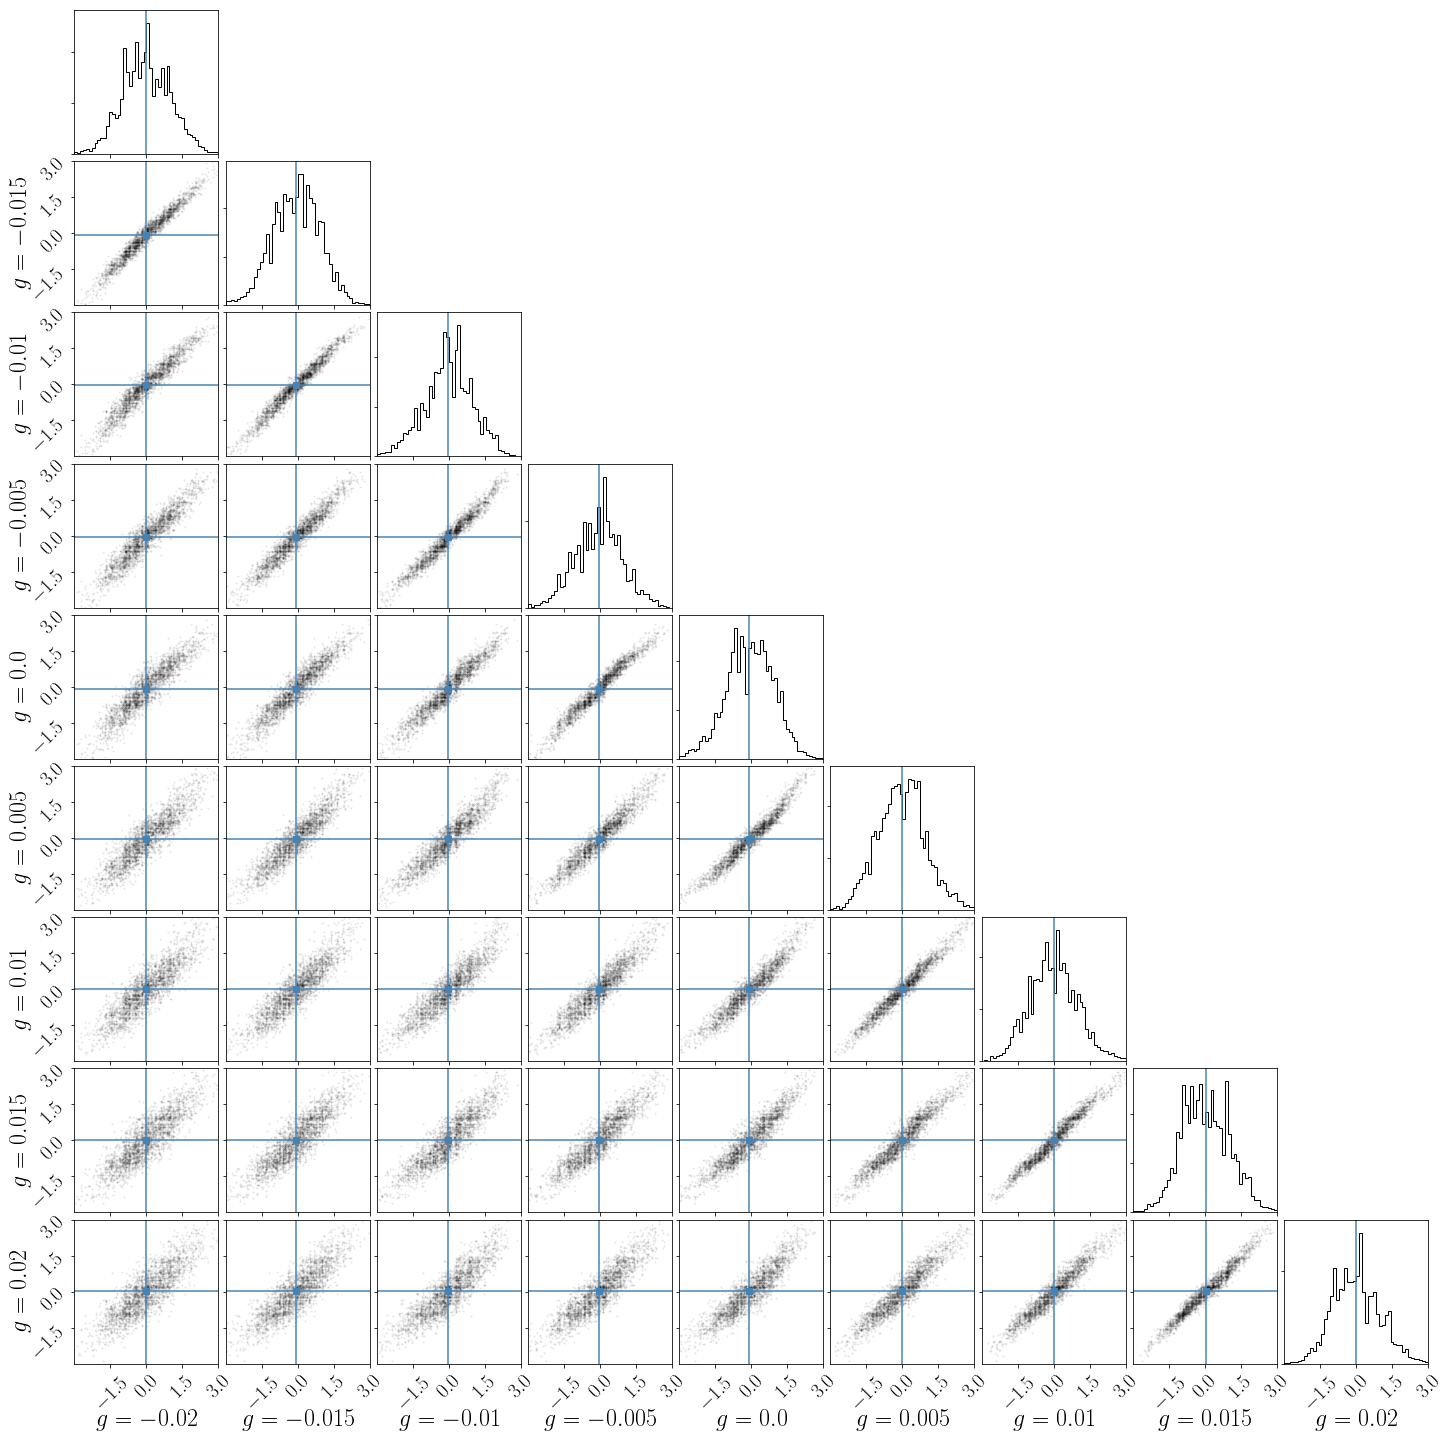

In [21]:
import corner 
plt.rc('text', usetex=True)
ndim = len(g1s)
hist2d_kwargs = {'plot_datapoints':True,'plot_density':False,'plot_contours':False, 
                     'no_fill_contours':False,'fill_contours':False, 'data_kwargs': {'alpha':0.1, 'markevery':4}  }
fig = corner.corner(data_grp, 
              bins=BINS_PULL, 
              truths=[np.mean(pulls_grp[i]) for i in range(len(g1s))], 
              range=[EXTENT_PULL]*len(g1s), 
              show_titles=False, 
              labels =[f"$g={round(g1,3)}$" for g1 in g1s],
              title_kwargs={"fontsize": 24},label_kwargs={"fontsize": 24}, 
              **hist2d_kwargs  )

axes = np.array(fig.axes).reshape(ndim, ndim)

#Loop over the histograms
for i in range(ndim):
    for j in range(ndim):
        ax = axes[i,j]
        ax.xaxis.set_tick_params(labelsize=20)
        ax.yaxis.set_tick_params(labelsize=20)



# fig.set_figheight(12)
# fig.set_figwidth(12)
#plt.savefig('triangle.pdf')

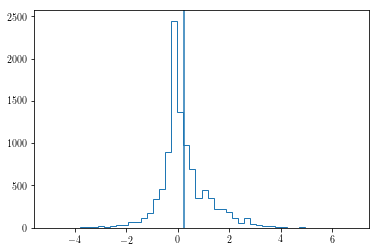

In [66]:
plt.hist(pulls_iso[4], histtype='step', bins=50)
plt.axvline(np.mean(pulls_iso[4]))

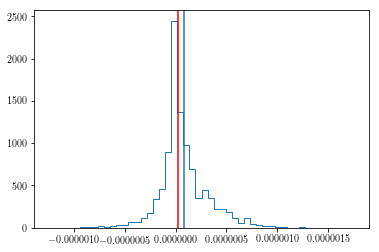

In [101]:
plt.hist(bmedians_iso2[4], histtype='step', bins=50)
plt.axvline(np.mean(bmedians_iso2[4]))
plt.axvline(np.mean(scat_meds_iso[4]), c = 'r')

## Histogram comparing the bias on shear for small applied shears 

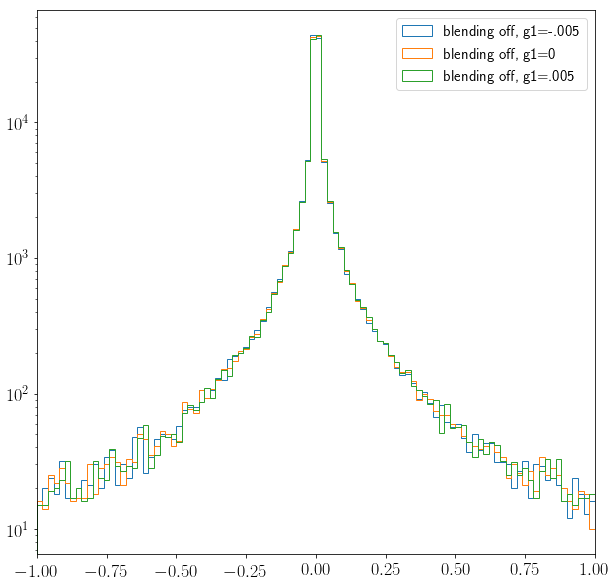

In [53]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax.hist(scats[3]['bias_g1'], bins = 100, histtype='step', label=f'blending off, g1=-.005', range = (-1,1))
ax.hist(scats[4]['bias_g1'], bins = 100, histtype='step', label=f'blending off, g1=0', range = (-1,1))
ax.hist(scats[5]['bias_g1'], bins = 100, histtype='step', label=f'blending off, g1=.005', range = (-1,1))

ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_yscale('log')
ax.set_xlim(-1,1)
plt.legend(loc='best', prop={'size': 15})

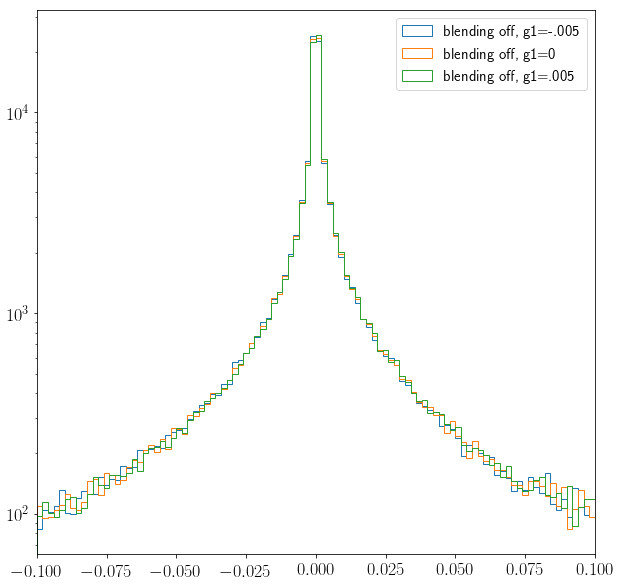

In [26]:
plt.rc('text', usetex=True)
fig, ax = plt.subplots(figsize=(10,10)) 
ax.hist(scats[3]['bias_g1'], bins = 100, histtype='step', label=f'blending off, g1=-.005', range = (-.1,.1))
ax.hist(scats[4]['bias_g1'], bins = 100, histtype='step', label=f'blending off, g1=0', range = (-.1,.1))
ax.hist(scats[5]['bias_g1'], bins = 100, histtype='step', label=f'blending off, g1=.005', range = (-.1,.1))

ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_yscale('log')
ax.set_xlim(-.1,.1)
plt.legend(loc='best', prop={'size': 15})

In [34]:
len(preamble.down_cut(preamble.up_cut(scats[4],'bias_g1',-.100),'bias_g1',-.100+.002))

109

## Histograms of biases for paper 

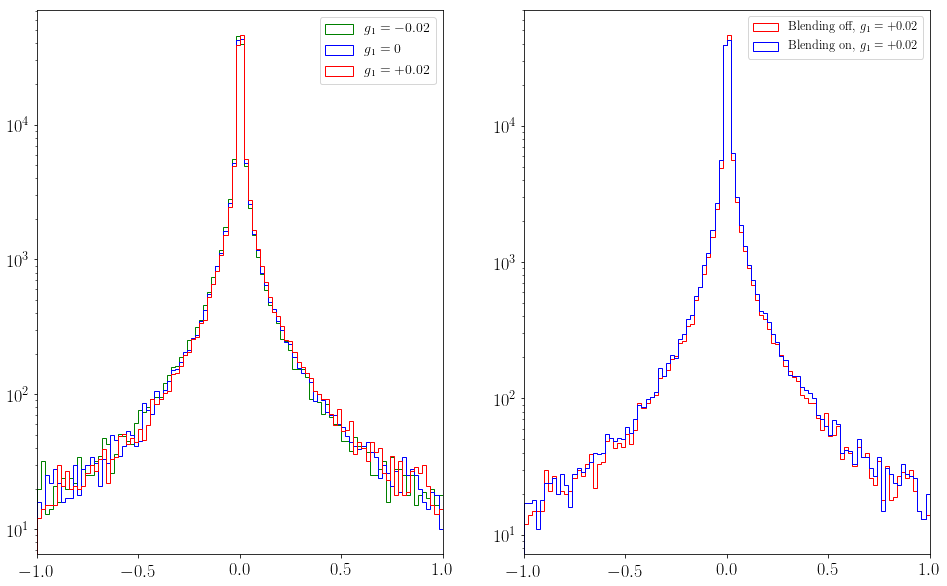

In [69]:
plt.rc('text', usetex=True)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 10))
ax1,ax2 = axes 

ax1.hist(scats[0]['bias_g1'], bins = 100, histtype='step', label='$g_{1}=-0.02$', range = (-1,1), color='green')
ax1.hist(scats[4]['bias_g1'], bins = 100, histtype='step', label='$g_{1}=0$', range = (-1,1), color='blue')
ax1.hist(scats[-1]['bias_g1'], bins = 100, histtype='step', label='$g_{1}=+0.02$', range = (-1,1), color='red')

ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.set_yscale('log')
ax1.set_xlim(-1,1)
ax1.legend(loc='best', prop={'size': 14})

ax2.hist(scats[-1]['bias_g1'], bins = 100, histtype='step', label='\\rm{Blending off,} $g_{1}=+0.02$', range = (-1,1), color= 'red')
ax2.hist(scats[-1]['bias_g1_grp'], bins = 100, histtype='step', label='\\rm{Blending on,} $g_{1}=+0.02$', range = (-1,1),color='blue')

ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.set_yscale('log')
ax2.set_xlim(-1,1)
ax2.legend(loc='best', prop={'size': 12.5})

## Why is the boostrapped medians of g = 0 so peaky? 

In [ ]:
len(scats[4])

In [12]:
medians1 = [] 
medians2 = [] 

for i in range(10000):
    medians1.append(np.median(np.random.choice(scats[4]['bias_g1'], len(scats[4]))))
    medians2.append(np.median(np.random.choice(scats[5]['bias_g1'], len(scats[4]))))

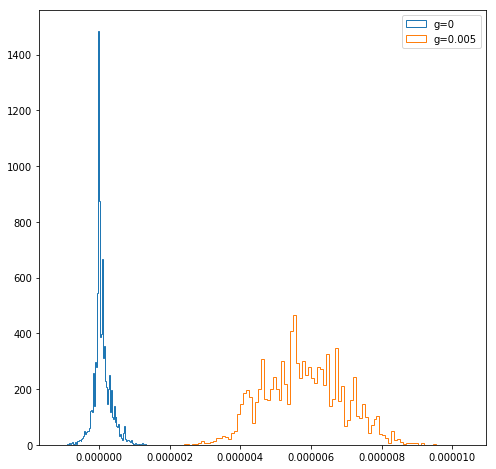

In [15]:
fig,ax = plt.subplots(figsize=(8,8))
ax.hist(medians1, bins = 100, histtype='step', label = 'g=0') 
ax.hist(medians2, bins = 100, histtype='step', label = 'g=0.005') 

plt.legend() 



# New money plots 

### Money plot with Pat's new suggestion

In [56]:
print(np.sqrt(np.diagonal(boot_covariance_matrix_iso[3:-3,3:-3])))
print()
print(np.sqrt(np.diagonal(boot_covariance_matrix_grp[3:-3,3:-3])))



[2.33208342e-06 1.75869023e-06 1.00110834e-06 2.52917510e-07
 1.14080858e-06 1.67281884e-06 2.33262094e-06]

[5.40333677e-06 4.86357211e-06 4.02608416e-06 3.17971791e-06
 3.62227216e-06 4.56814593e-06 6.04199591e-06]


Results for fits of blended case: 

means grp: [-0.005725802, -0.104234904, 0.3667351, -0.008052083, 0.000104242616, -0.017771024, -0.011497866, -0.009707973, -0.07515411]

medians grp: [-7.7299155e-05, -5.386315e-05, -3.5307126e-05, -1.7741842e-05, -1.7578379e-06, 1.2734165e-05, 3.0312924e-05, 5.144745e-05, 7.524933e-05]

errs grp: [6.609567208215594e-06, 5.001420504413545e-06, 4.7019893827382475e-06, 3.6095871109864675e-06, 3.0321223221108085e-06, 3.436081897234544e-06, 4.716755938716233e-06, 6.568108801729977e-06, 7.138405635487288e-06]


value b0:     3.368e-03
error b0:     9.240e-05
value b1:     -4.180e-06
error b1:     1.760e-06
error correlation coefficient: -1.303e-01


###################################
means iso: [-0.0046843835, -0.0036375287, -0.002592183, -0.0015476916, -0.00050333404, 0.0005415727, 0.0015865519, 0.002631363, 0.0036765877]
medians iso: [-3.64856e-05, -2.3287685e-05, -1.2499681e-05, -4.3368004e-06, 2.074546e-08, 5.755613e-06, 1.4133995e-05, 2.5396606e-05,

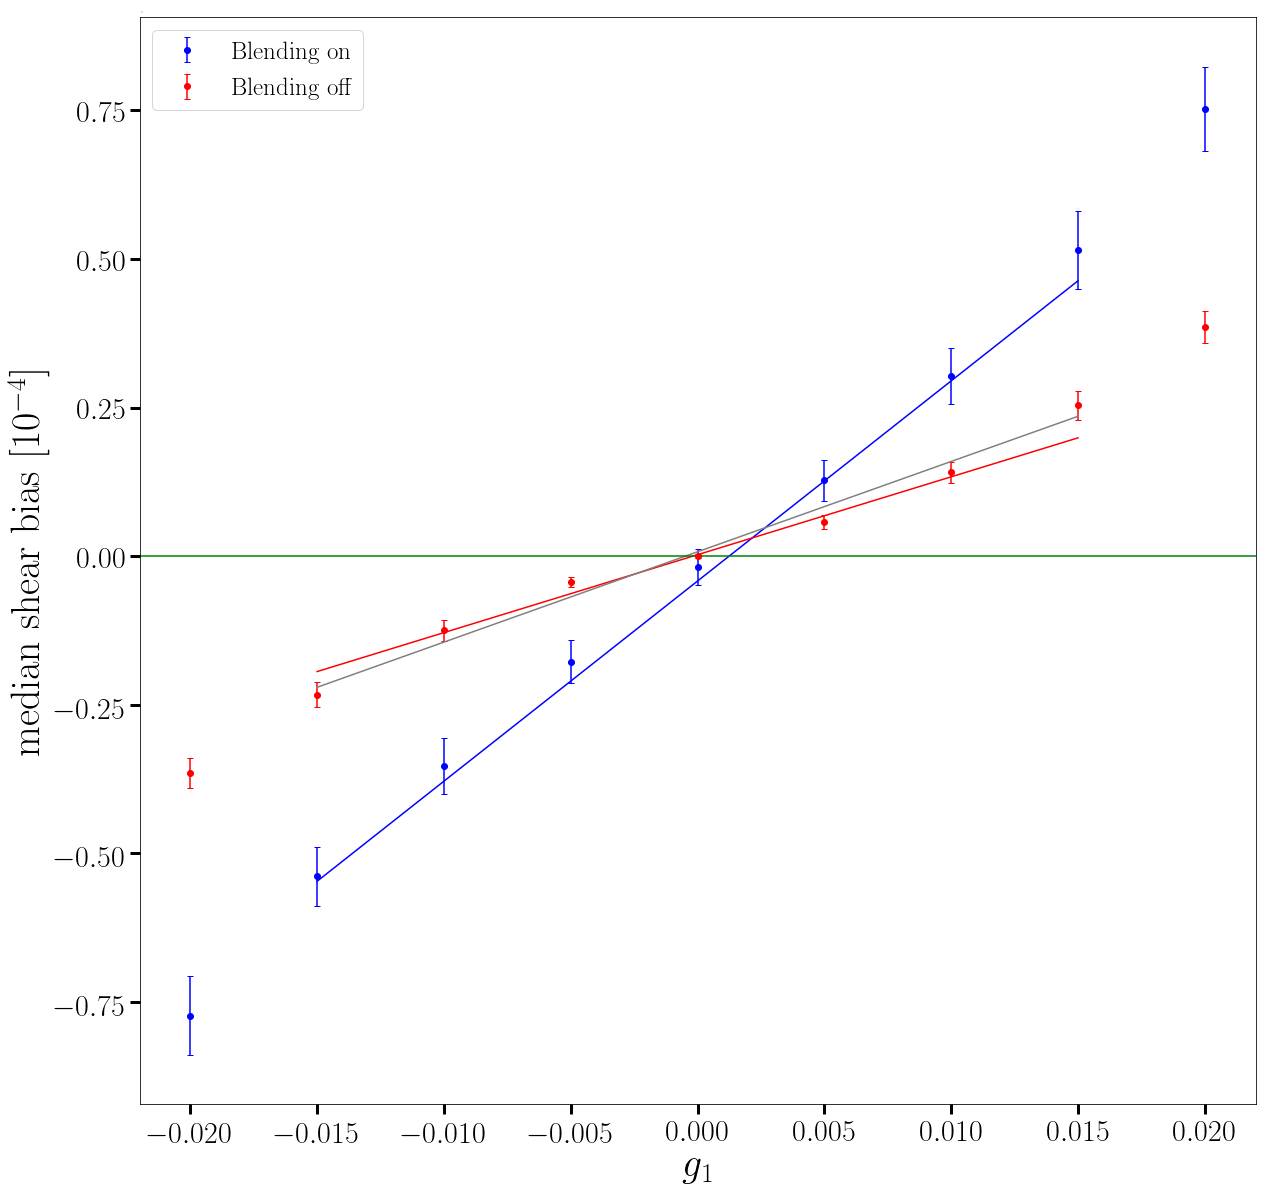

In [57]:
small_get_money_plot(g1s, 'g1', errs_LSST_grp, errs_LSST_iso,scats,errors.chi_sq_fit,{'cov_iso':boot_covariance_matrix_iso[3:-3,3:-3], 
             'cov_grp':boot_covariance_matrix_grp[3:-3,3:-3],'inv_iso':None,'inv_grp':None, 
              'model':errors.linear_f}, labely1='median shear bias $[10^{-4}]$')

In [38]:
boot_correlation_matrix_iso.shape

(13, 13)

In [49]:
len(errs_LSST_grp)

9

### Money plot with ALL points fitting to a cubic 

In [25]:
%run /nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/WeakLensingDeblending/mycode/preamble.py
%run /nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/WeakLensingDeblending/mycode/errors.py

In [26]:
new_main_catsLSST = []  
for key in files:
    results = fits.open(files[key])
    new_main_catsLSST.append(not_bad(get_non_duplicated_cat(Table.read(results,hdu=1)))) #assume not many objects are duplicated/bad.
    print('reading {}'.format(key))

reading final_fitsLSST1
reading final_fitsLSST2
reading final_fitsLSST3
reading final_fitsLSST4
reading final_fitsLSST5
reading final_fitsLSST6
reading final_fitsLSST7
reading final_fitsLSST8
reading final_fitsLSST9
reading final_fitsLSST10
reading final_fitsLSST11
reading final_fitsLSST12
reading final_fitsLSST13
reading final_fitsLSST1_ss1
reading final_fitsLSST2_ss1
reading final_fitsLSST3_ss1
reading final_fitsLSST4_ss1
reading final_fitsLSST5_ss1
reading final_fitsLSST6_ss1
reading final_fitsLSST7_ss1
reading final_fitsLSST8_ss1
reading final_fitsLSST9_ss1


In [27]:
new_main_catsLSST = new_main_catsLSST[:13]

In [29]:
main_catsLSST = new_main_catsLSST[2:-2]

In [30]:
def chi_sq_fit_new(g1s,medians, fit_args): 
    # print(g1s)
    x0=np.array([0,0,0])
    iso_or_grp = fit_args['iso_or_grp']
    cov = fit_args['cov_{}'.format(iso_or_grp)]
    inv = fit_args['inv_{}'.format(iso_or_grp)]

    result =  opt.minimize(chisqfunc_new,x0,args=(cov,fit_args['model'], medians, np.array(g1s), inv))

    b0,b1, b3 = result.x

    #get covariance matrix of estimated parameters. 
    param_cov = chisq_cov_new(cov,np.array(g1s),inv)

    b0_error = np.sqrt(param_cov[0,0])
    b1_error = np.sqrt(param_cov[1,1])
    b3_error = np.sqrt(param_cov[2,2])
#     corr = param_cov[0,1]/np.sqrt(param_cov[0,0]*param_cov[1,1])
    
    return b0,b1,b3, b0_error, b1_error, b3_error  

def chisqfunc_new(x0,cov, model, med_shear_bias,app_shear,inv=None): 
    #errs is a vector of errors on the median shear biases calculated using bootstrap 
    #corr is the correlation matrix calculated between the common elements of the 9 samples. 
    b0,b1, b3 = x0[0], x0[1] , x0[2] 

    invcov = np.linalg.inv(cov)

    if inv: 
        invcov = inv 
    
    #now we used the mixed covariance matrix to calculate the chi-squared: 
    #model = b1 + b0*app_shear
    model_value = model(b0,b1,b3, app_shear)
    chi2 = np.dot((med_shear_bias - model_value), np.dot(invcov, med_shear_bias - model_value))
    
    return chi2

#chi-squared function to calculate linear regression coefficients using covariance matrix. 
def chisq_cov_new(cov,app_shear,inv=None):
    invcov = np.linalg.inv(cov)
    
    if inv: 
        invcov = inv 
    
    #get H matrix, 
    H = np.zeros((len(app_shear), 3)) # 3 refers to b0,b1,b3
    for i in range(len(app_shear)): 
        for j in range(3):
            if j == 0: 
                H[i,j] = 1. 
            elif j == 1: 
                H[i,j] = app_shear[i] 
            else: 
                H[i,j] = app_shear[i]**3 
    
    return np.linalg.inv(np.dot(H.T,np.dot(invcov,H)))


def get_money_plot_new(g1s,g1_or_g2,errs_grp,errs_iso,cats,fit_procedure, fit_args,ticks1=None, labely1=None):
    plt.rc('text', usetex=True)

    figure1 = plt.figure(figsize=(20, 20))

    ################################ BLENDED  ################################################

    means = [np.mean(cat['bias_{}_grp'.format(g1_or_g2)]) for cat in cats]
    medians = [np.median(cat['bias_{}_grp'.format(g1_or_g2)]) for cat in cats]
    sigmas = [preamble.mad(cat['bias_{}_grp'.format(g1_or_g2)]) for cat in cats]
    
    # use the method describe in the page above for std of the median 
    fit_args['errs'] = errs_grp  #this line is only useful in the case of a linear fit

    ax = figure1.add_subplot(111)
    ax.errorbar(g1s,medians,yerr=errs_grp,marker='o',linestyle=' ',color='blue',capsize=3,label="\\rm Blending on" )
    
    fit_args['iso_or_grp'] = 'grp'
    beta0, beta1,beta3,beta0_err,beta1_err, beta3_err = fit_procedure(g1s,medians, fit_args)

    #plot line, 
    x = np.linspace(min(g1s),max(g1s),30)
    y = [errors.cubic_f(beta0,beta1,beta3, g1) for g1 in x]
    #y = [beta0*g1 + beta1 for g1 in x]
    ax.plot(x,y,c='b')

    print("Results for fits of blended case: ")
    print()


    #this first set of print statements are good for debugging. 
    print('means grp:', means)
    print()
    print('medians grp:',medians)
    print()
    print('sigmas grp:',sigmas)
    print()
    print('errs grp:',errs_grp)
    print()

    print()
    print('value b0:     {:.3e}'.format(beta0))
    print('error b0:     {:.3e}'.format(beta0_err))
    print('value b1:     {:.3e}'.format(beta1) )
    print('error b1:     {:.3e}'.format(beta1_err))
    print('value b3:     {:.3e}'.format(beta3) )
    print('error b3:     {:.3e}'.format(beta3_err))    
    print()


    print() 
    print('###################################')

    ################################ UNBLENDED  ################################################

    means = [np.mean(cat['bias_{}'.format(g1_or_g2)]) for cat in cats]
    medians = [np.median(cat['bias_{}'.format(g1_or_g2)]) for cat in cats]
    sigmas = [preamble.mad(cat['bias_{}'.format(g1_or_g2)]) for cat in cats]
    # use the method describe in the page above for std of the median 
    fit_args['errs'] = errs_iso
    fit_args['iso_or_grp'] = 'iso'

    ax.errorbar(g1s,medians,yerr=errs_iso,marker='o',linestyle=' ',color='red',capsize=3, label = "\\rm Blending off")

    beta0, beta1,beta3,beta0_err,beta1_err, beta3_err = fit_procedure(g1s,medians, fit_args)

    #plot line, 
    x = np.linspace(min(g1s),max(g1s),30)
    y = [errors.cubic_f(beta0,beta1,beta3, g1) for g1 in x]
    #y = [beta0*g1 + beta1 for g1 in x]
    ax.plot(x,y,c='r')


    #print useful debugging information. 
    print('means iso:',  means)
    print('medians iso:',medians)
    print('sigmas iso:', sigmas )
    print('errs iso:', errs_iso)
    print()

    print()
    print('value b0:     {:.3e}'.format(beta0))
    print('error b0:     {:.3e}'.format(beta0_err))
    print('value b1:     {:.3e}'.format(beta1) )
    print('error b1:     {:.3e}'.format(beta1_err))
    print('value b3:     {:.3e}'.format(beta3) )
    print('error b3:     {:.3e}'.format(beta3_err))    
    print()


    ################################################################################################

    #formatting 
    
    #plt.ylim(-10,10)
    #ax1.set_xlim([-.025,.025])


    ax.tick_params(axis='both', which='major', labelsize=30)

    # ax1.yticks(size=20)
    num = g1_or_g2[1:]

    ax.set_xlabel('$g_{}$'.format(num),size=40)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    
    ax.get_yaxis().get_offset_text().set_size(1)
    ax.set_ylabel('\\rm median shear bias $[10^{-3}]$',size=40)
#     else: 
    #ax.get_yaxis().get_offset_text().set_size(40)


    ax.axhline(0,c='g')

    ax.tick_params(axis='both', size=10,width=3,which='both')


    if ticks1 != None: 
        ax.set_yticklabels(ticks1)
    
        
    ax.legend(loc='best', prop={'size':25})

In [70]:
def pent_f(b0,b1,b3,b5,x): 
    return b0 + b1 * x + b3*(x**3) + b5*(x**5)

def chi_sq_fit_new2(g1s,medians, fit_args): 
    # print(g1s)
    x0=np.array([0,0,0, 0])
    iso_or_grp = fit_args['iso_or_grp']
    cov = fit_args['cov_{}'.format(iso_or_grp)]
    inv = fit_args['inv_{}'.format(iso_or_grp)]

    result =  opt.minimize(chisqfunc_new2,x0,args=(cov,fit_args['model'], medians, np.array(g1s), inv))

    b0,b1, b3, b5 = result.x

    #get covariance matrix of estimated parameters. 
    param_cov = chisq_cov_new2(cov,np.array(g1s),inv)

    b0_error = np.sqrt(param_cov[0,0])
    b1_error = np.sqrt(param_cov[1,1])
    b3_error = np.sqrt(param_cov[2,2])
    b5_error = np.sqrt(param_cov[3,3])
#     corr = param_cov[0,1]/np.sqrt(param_cov[0,0]*param_cov[1,1])
    
    return b0,b1,b3,b5, b0_error, b1_error, b3_error  , b5_error

def chisqfunc_new2(x0,cov, model, med_shear_bias,app_shear,inv=None): 
    #errs is a vector of errors on the median shear biases calculated using bootstrap 
    #corr is the correlation matrix calculated between the common elements of the 9 samples. 
    b0,b1, b3, b5 = x0[0], x0[1] , x0[2], x0[3] 

    invcov = np.linalg.inv(cov)

    if inv: 
        invcov = inv 
    
    #now we used the mixed covariance matrix to calculate the chi-squared: 
    #model = b1 + b0*app_shear
    model_value = model(b0,b1,b3,b5,app_shear)
    chi2 = np.dot((med_shear_bias - model_value), np.dot(invcov, med_shear_bias - model_value))
    
    return chi2

#chi-squared function to calculate linear regression coefficients using covariance matrix. 
def chisq_cov_new2(cov,app_shear,inv=None):
    invcov = np.linalg.inv(cov)
    
    if inv: 
        invcov = inv 
    
    #get H matrix, 
    H = np.zeros((len(app_shear), 4)) # 3 refers to b0,b1,b3, b5 in that order. 
    for i in range(len(app_shear)): 
        for j in range(4):
            if j == 0: 
                H[i,j] = 1. 
            elif j == 1: 
                H[i,j] = app_shear[i] 
            elif j ==2: 
                H[i,j] = app_shear[i]**3 
            else: 
                H[i,j] = app_shear[i]**5 
    
    return np.linalg.inv(np.dot(H.T,np.dot(invcov,H)))


def get_money_plot_new2(g1s,g1_or_g2,errs_grp,errs_iso,cats,fit_procedure, fit_args, labely1=None):
    plt.rc('text', usetex=True)

    figure1 = plt.figure(figsize=(20, 20))

    ################################ BLENDED  ################################################

    means = [np.mean(cat['bias_{}_grp'.format(g1_or_g2)]) for cat in cats]
    medians = [np.median(cat['bias_{}_grp'.format(g1_or_g2)]) for cat in cats]
    sigmas = [preamble.mad(cat['bias_{}_grp'.format(g1_or_g2)]) for cat in cats]
    
    # use the method describe in the page above for std of the median 
    fit_args['errs'] = errs_grp  #this line is only useful in the case of a linear fit

    ax = figure1.add_subplot(111)
    ax.errorbar(g1s,medians,yerr=errs_grp,marker='o',linestyle=' ',color='blue',capsize=3,label="\\rm Blending on" )
    
    fit_args['iso_or_grp'] = 'grp'
    beta0, beta1,beta3,beta5, beta0_err,beta1_err, beta3_err, beta5_err = fit_procedure(g1s,medians, fit_args)

    #plot line, 
    x= np.linspace(min(g1s),max(g1s),30)
    y = [pent_f(beta0,beta1,beta3,beta5,g1) for g1 in x]
    ax.plot(x,y,c='b')

#     print("Results for fits of blended case: ")
#     print()


#     #this first set of print statements are good for debugging. 
#     print('means grp:', means)
#     print()
#     print('medians grp:',medians)
#     print()
#     print('sigmas grp:',sigmas)
#     print()
#     print('errs grp:',errs_grp)
#     print()

#     print()
#     print('value b0:     {:.3e}'.format(beta0))
#     print('error b0:     {:.3e}'.format(beta0_err))
#     print('value b1:     {:.3e}'.format(beta1) )
#     print('error b1:     {:.3e}'.format(beta1_err))
#     print('value b3:     {:.3e}'.format(beta3) )
#     print('error b3:     {:.3e}'.format(beta3_err))    
#     print()


#     print() 
#     print('###################################')

    ################################ UNBLENDED  ################################################

    means = [np.mean(cat['bias_{}'.format(g1_or_g2)]) for cat in cats]
    medians = [np.median(cat['bias_{}'.format(g1_or_g2)]) for cat in cats]
    sigmas = [preamble.mad(cat['bias_{}'.format(g1_or_g2)]) for cat in cats]
    # use the method describe in the page above for std of the median 
    fit_args['errs'] = errs_iso
    fit_args['iso_or_grp'] = 'iso'

    ax.errorbar(g1s,medians,yerr=errs_iso,marker='o',linestyle=' ',color='red',capsize=3, label = "\\rm Blending off")

    beta0, beta1,beta3, beta5, beta0_err,beta1_err, beta3_err, beta5_err = fit_procedure(g1s,medians, fit_args)

    #plot line, 
    x = np.linspace(min(g1s),max(g1s),30)
    y = [pent_f(beta0,beta1,beta3,beta5, g1) for g1 in x]
    #y = [beta0*g1 + beta1 for g1 in x]
    ax.plot(x,y,c='r')


    #print useful debugging information. 
#     print('means iso:',  means)
#     print('medians iso:',medians)
#     print('sigmas iso:', sigmas )
#     print('errs iso:', errs_iso)
#     print()

#     print()
#     print('value b0:     {:.3e}'.format(beta0))
#     print('error b0:     {:.3e}'.format(beta0_err))
#     print('value b1:     {:.3e}'.format(beta1) )
#     print('error b1:     {:.3e}'.format(beta1_err))
#     print('value b3:     {:.3e}'.format(beta3) )
#     print('error b3:     {:.3e}'.format(beta3_err))    
#     print()


    ################################################################################################

    #formatting 
    
    #plt.ylim(-10,10)
    #ax1.set_xlim([-.025,.025])


    ax.tick_params(axis='both', which='major', labelsize=40)

    # ax1.yticks(size=20)
    num = g1_or_g2[1:]

    ax.set_xlabel('$g_{}$'.format(num),size=40)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    
    ax.get_yaxis().get_offset_text().set_size(1)
    ax.set_ylabel('\\rm median shear bias $[10^{-4}]$',size=40)
#     else: 
    #ax.get_yaxis().get_offset_text().set_size(40)


    ax.axhline(0,c='g')

    ax.tick_params(axis='both', size=10,width=3,which='both')
    
    yticks = ax.get_yticks()
    ax.set_yticklabels([f"${round(ytick*1e4, 1):.0f}$" for ytick in yticks])



        
    ax.legend(loc='best', prop={'size':35})

In [32]:
new_g1s = [-.1, -.05, -.02,-.015,-.01,-.005,0.,.005,.01,.015,.02, .05, .1]

In [33]:
filters = [good,best]

In [37]:
zero_shear_cat = new_main_catsLSST[6]

In [38]:
new_selection_cats = selection_filter(new_main_catsLSST, filters, zero_shear_cat)

In [39]:
#read boostrap matrices from file. 
boot_matrices = pickle.load(open('mycode/notebooks/paper/data/bootstrap_matrices_new_shears.p','rb'), encoding='latin1')
boot_covariance_matrix_iso, boot_covariance_matrix_grp, boot_correlation_matrix_iso, boot_correlation_matrix_grp = boot_matrices

In [40]:
new_errs_LSST_iso = np.sqrt(np.diag(boot_covariance_matrix_iso))
new_errs_LSST_grp = np.sqrt(np.diag(boot_covariance_matrix_grp))

In [36]:
# new_errs_LSST_grp = errors.errs_param_boot(new_selection_cats,'bias_g1_grp',10000, np.median) 
# new_errs_LSST_iso = errors.errs_param_boot(new_selection_cats,'bias_g1',10000, np.median) 

NameError: name 'bootstrap_param_cat' is not defined

Results for fits of blended case: 

means grp: [-0.017044988, -0.013322078, -0.0057424293, -0.015945015, -0.00020379777, -0.00807536, 0.000105357394, -0.017811732, -0.011525031, -0.0097390255, -0.0030924403, 0.00516997, 0.017636586]

medians grp: [-0.0007350175, -0.00026475106, -7.7531164e-05, -5.4023694e-05, -3.544843e-05, -1.7771466e-05, -1.8168521e-06, 1.27068715e-05, 3.023991e-05, 5.144745e-05, 7.539364e-05, 0.00025615311, 0.00072131725]

sigmas grp: [0.0067739394, 0.006467907, 0.0063083917, 0.0062772036, 0.0062571517, 0.0062462175, 0.006241205, 0.006242632, 0.0062538777, 0.0062813675, 0.0063077076, 0.00648613, 0.0067780623]

errs grp: [1.94568013e-05 1.11900984e-05 6.46030489e-06 5.40333677e-06
 4.86357211e-06 4.02608416e-06 3.17971791e-06 3.62227216e-06
 4.56814593e-06 6.04199591e-06 6.81989635e-06 1.08965629e-05
 1.84706223e-05]


value b0:     -4.110e-06
error b0:     1.621e-06
value b1:     3.810e-03
error b1:     8.233e-05
value b3:     3.155e-01
error b3:     8.764e-03


###

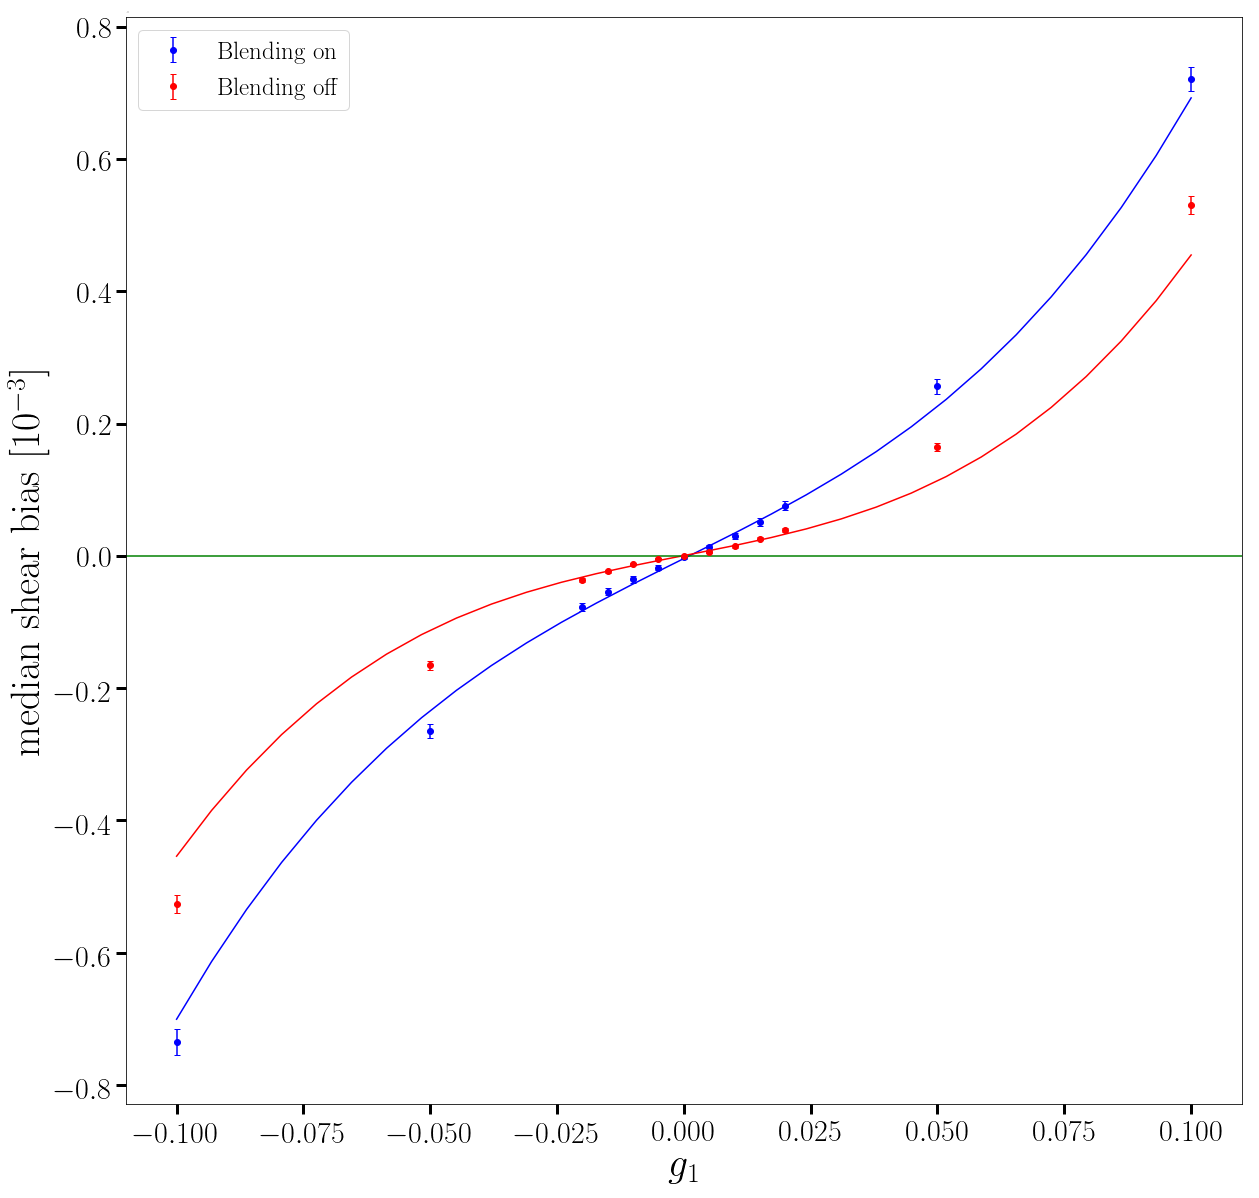

In [41]:
get_money_plot_new(new_g1s, 'g1', new_errs_LSST_grp, new_errs_LSST_iso,new_selection_cats,chi_sq_fit_new,{'cov_iso':boot_covariance_matrix_iso, 
             'cov_grp':boot_covariance_matrix_grp,'inv_iso':None,'inv_grp':None, 
              'model':errors.cubic_f})

#, labely1='median shear bias $[10^{-4}]$'

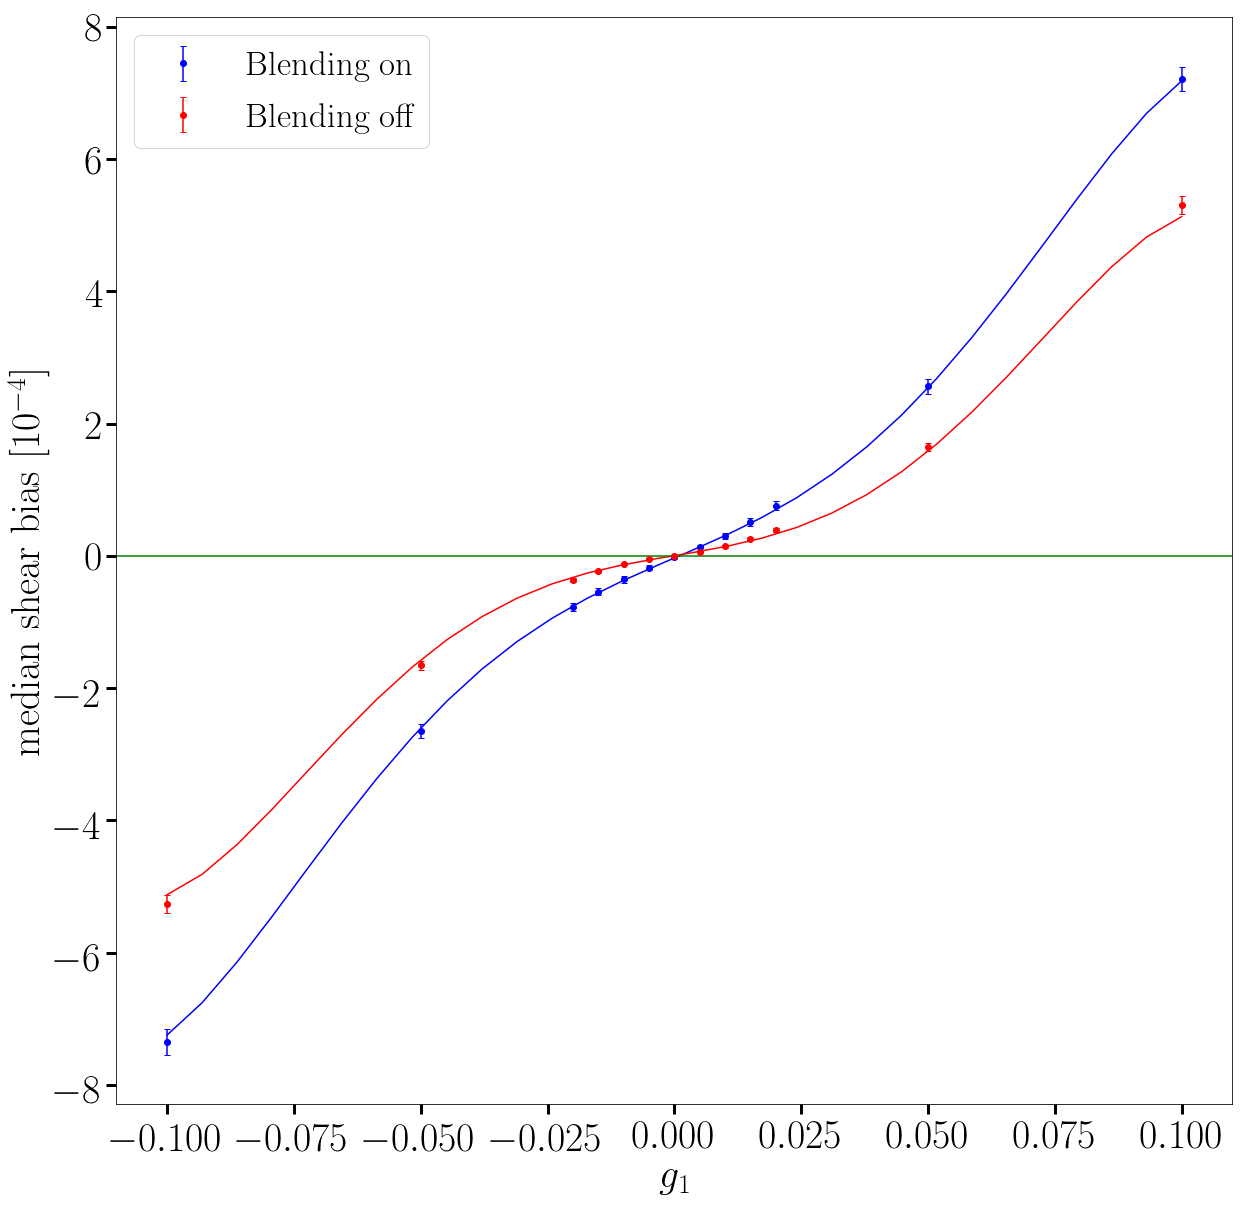

In [71]:
get_money_plot_new2(new_g1s, 'g1', new_errs_LSST_grp, new_errs_LSST_iso,new_selection_cats,chi_sq_fit_new2,{'cov_iso':boot_covariance_matrix_iso, 
             'cov_grp':boot_covariance_matrix_grp,'inv_iso':None,'inv_grp':None, 
              'model':pent_f})

#, labely1='median shear bias $[10^{-4}]$'

# Final tomographic results for n = 5373 

## actual plot 

In [93]:
import scipy.odr

def glinear_fit(x,y,yerrs):
    linear = scipy.odr.Model(errors.linear_f_odr)
    mydata = scipy.odr.RealData(x, y, sy=yerrs)
    myodr = scipy.odr.ODR(mydata, linear,beta0=[1.,2.])
    myoutput = myodr.run()
    #myoutput.pprint()
    beta0 = myoutput.beta[0]
    beta1 = myoutput.beta[1]
    real_cov_matrix = myoutput.cov_beta* myoutput.res_var
    
    #return beta0, beta1, np.sqrt(myoutput.cov_beta[0,0]), np.sqrt(myoutput.cov_beta[1,1]), myoutput.cov_beta[0,1]/np.sqrt(myoutput.cov_beta[0,0]*myoutput.cov_beta[1,1])
    return beta0, beta1, myoutput.sd_beta[0], myoutput.sd_beta[1], real_cov_matrix[0,1]

def semi_glinear_fit(x,y,yerrs):
    linear = scipy.odr.Model(errors.semilinear_f_odr)
    mydata = scipy.odr.RealData(x, y, sy=yerrs)
    myodr = scipy.odr.ODR(mydata, linear,beta0=[1.])
    myoutput = myodr.run()
    #myoutput.pprint()
    beta0 = myoutput.beta[0]
    
    return beta0, np.sqrt(myoutput.cov_beta[0,0])





In [78]:
num_boots = 5373
tomos = np.linspace(0.2, 1.2, 6)
project_dir = 'mycode/tomo/project1'

tomo_cats = pickle.load(open('mycode/tomo/project1/tomo_cats.p','rb'), encoding='latin1')

[len(cats[4]) for cats in tomo_cats]

#load original results 
tomo_errs, tomo_bootstrap_matrices, tomo_ms = tomo_fncs.load_tomos(project_dir)

tomo_ms_iso, tomo_ms_errs_iso, tomo_ms_grp, tomo_ms_errs_grp = tomo_ms 


zmax: 1.1
m0 (blending off): 0.00169
m0 err (blending off): 0.000173
m_avg (blending off): 0.000765
m_avg err (blending off): 0.000293
correlation (blending off): -0.4931892914847024

m0 (blending on): 0.00327
m0 err (blending on): 0.000175
m_avg (blending on): 0.00226
m_avg err (blending on): 0.000297
correlation (blending on): -0.48892892114743847


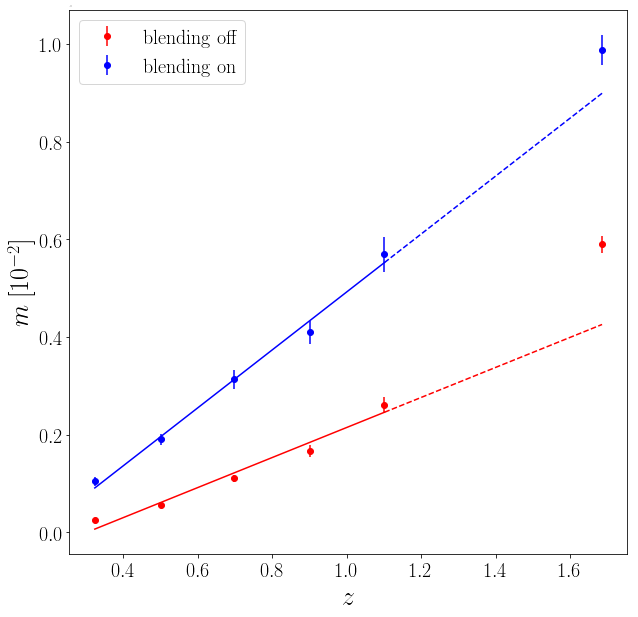

In [88]:
### in this new version (November 2, 2018) - we ignore the last point in the fit per Pat's suggestion
#and make this explicit in the plot by not plotting anything beyond that point. 
plt.rc('text',usetex=True)

fig,ax = plt.subplots(figsize=(10,10))
#x = [0.3,0.5,0.7,0.9,1.1, 1.3] #middle of each bin (except for the last one).
x = [np.median(tomo_cats[i][4]['z']) for i in range(len(tomo_cats))] #same across shears. 
ax.errorbar(x, tomo_ms_iso, yerr= tomo_ms_errs_iso,  color='r', marker='o',linestyle=' ', label= '\\rm{blending off}')
ax.errorbar(x, tomo_ms_grp, yerr=tomo_ms_errs_grp, color='b' , marker='o',linestyle= ' ', label='\\rm{blending on}')
plt.legend(loc=2, prop={'size':20}) 

zmax = np.median(tomo_cats[-2][4]['z'])

#do fit and draw the line. 
#drop the last 'overflow' bin for fitting purposes.  
beta0_iso, beta1_iso,beta0_err_iso,beta1_err_iso,beta01_cov_iso = glinear_fit(x[:-1],tomo_ms_iso[:-1],tomo_ms_errs_iso[:-1])
beta0_grp, beta1_grp,beta0_err_grp,beta1_err_grp,beta01_cov_grp = glinear_fit(x[:-1],tomo_ms_grp[:-1],tomo_ms_errs_grp[:-1])

y_line_iso= errors.get_line(x,beta0_iso,beta1_iso)
y_line_grp= errors.get_line(x,beta0_grp,beta1_grp)

#do not plot it all the way to the last bin.
ax.plot(x[:-1],y_line_iso[:-1], color='red')
ax.plot(x[:-1],y_line_grp[:-1], color='blue')

#plot the last bin dashed 
ax.plot(x[-2:],y_line_iso[-2:], color='red', linestyle='dashed')
ax.plot(x[-2:],y_line_grp[-2:], color='blue', linestyle='dashed')


ax.set_xlabel('$z$', size=26)
ax.set_ylabel('$m \\; [10^{-2}]$', size=26)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.ticklabel_format(style='sci', axis='y', scilimits=(-0, 0))
ax.get_yaxis().get_offset_text().set_size(1)

m0_iso = zmax * beta0_iso / 2
m0_err_iso = beta0_err_iso * zmax /2 
m0_grp = zmax * beta0_grp / 2
m0_err_grp = beta0_err_grp * zmax /2 


m_avg_iso = beta1_iso + m0_iso
m_avg_iso_err = np.sqrt(beta1_err_iso**2 + m0_err_iso**2)
m_avg_grp = beta1_grp + m0_grp
m_avg_grp_err = np.sqrt(beta1_err_grp**2 + m0_err_grp**2)

corr_iso = ((zmax/2) * beta01_cov_iso + (zmax/2)**2 * beta0_err_iso**2) / np.sqrt(((zmax**2 /4)*beta0_err_iso**2) *(beta1_err_iso**2 + zmax*beta01_cov_iso + (zmax**2/4) * beta0_err_iso**2) )
corr_grp = ((zmax/2) * beta01_cov_grp + (zmax/2)**2 * beta0_err_grp**2) / np.sqrt(((zmax**2 /4)*beta0_err_grp**2) *(beta1_err_grp**2 + zmax*beta01_cov_grp + (zmax**2/4) * beta0_err_grp**2) )


print()
print(f"zmax: {zmax:.3g}")
print(f"m0 (blending off): {m0_iso:.3g}")
print(f"m0 err (blending off): {m0_err_iso:.3g}")
print(f"m_avg (blending off): {m_avg_iso:.3g}")
print(f"m_avg err (blending off): {m_avg_iso_err:.3g}")
print(f"correlation (blending off): {corr_iso}")
print()

print(f"m0 (blending on): {m0_grp:.3g}")
print(f"m0 err (blending on): {m0_err_grp:.3g}")
print(f"m_avg (blending on): {m_avg_grp:.3g}")
print(f"m_avg err (blending on): {m_avg_grp_err:.3g}")
print(f"correlation (blending on): {corr_grp}")







In [23]:
tomo_ms_iso

[0.0002599601303981426,
 0.0005569660548470946,
 0.0011077809956607054,
 0.0016638360502035446,
 0.0026129817614199973,
 0.0058945198910100305]

In [46]:
tomo_ms_grp

[0.0010476207310946592,
 0.0019020117051156073,
 0.0031304445922458166,
 0.004093672785214046,
 0.005695759726218237,
 0.009881579124719535]

## obtain and print resulting covariance matrix. 

In [14]:
all_boot_ms_iso = pickle.load(open(os.path.join(project_dir,f'all_boot_ms_iso{num_boots}.p'),'rb'), encoding='latin1')
all_boot_ms_grp = pickle.load(open(os.path.join(project_dir,f'all_boot_ms_grp{num_boots}.p'),'rb'), encoding='latin1')


In [43]:
len(all_boot_ms_iso)

5373

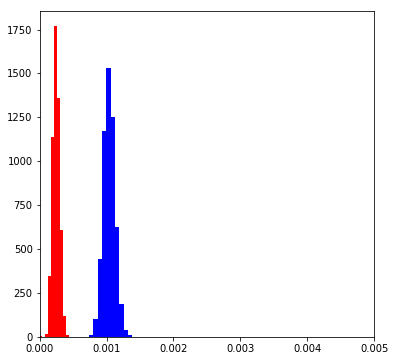

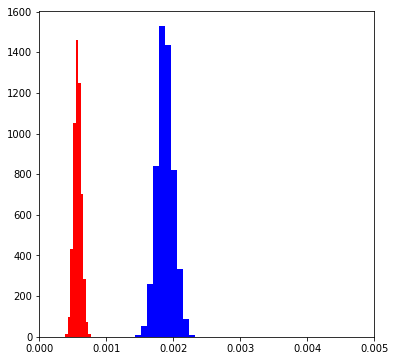

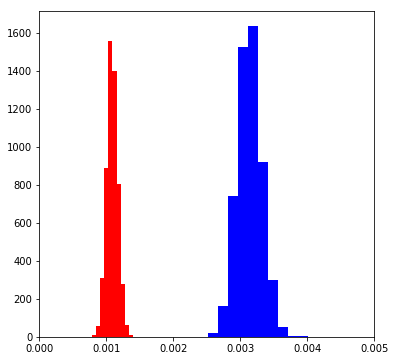

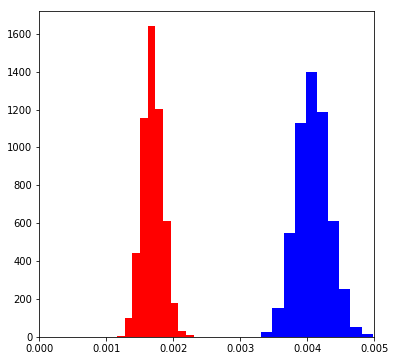

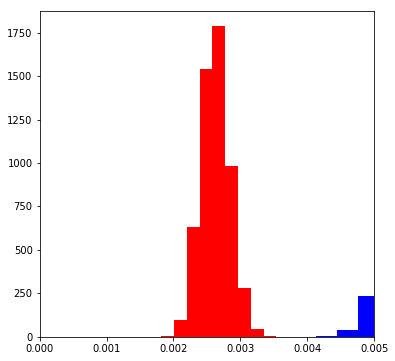

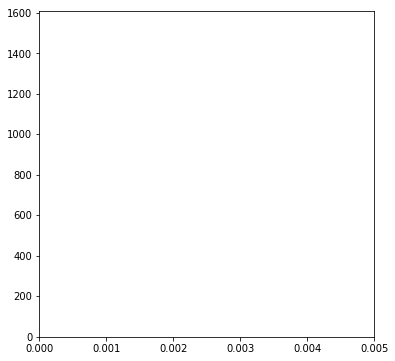

In [59]:
for i in range(len(all_boot_ms_iso)):
    fig,ax = plt.subplots(figsize=(6,6))
    ax.hist(all_boot_ms_iso[i], color='red' )
    ax.hist(all_boot_ms_grp[i], color='blue')
    ax.set_xlim([0,0.005])



In [15]:
cov_tomo_ms_iso, cov_tomo_ms_grp, corr_tomo_ms_iso, corr_tomo_ms_grp = pickle.load(open(os.path.join(project_dir,f'cov_corr_tomo_ms{num_boots}.p'),'rb'),encoding='latin1')

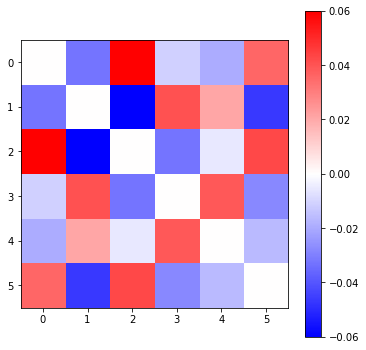

In [21]:
plt.figure(figsize=(6,6))
plt.imshow(corr_tomo_ms_iso- np.eye(6,6), cmap='bwr',vmin=-0.06, vmax=0.06)
plt.colorbar()

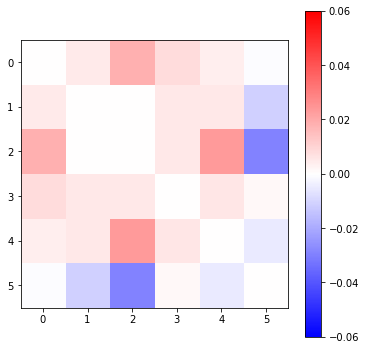

In [20]:
plt.figure(figsize=(6,6))
plt.imshow(corr_tomo_ms_grp-np.eye(6,6), cmap='bwr', vmin=-0.06, vmax=0.06)
plt.colorbar()

In [25]:
%precision 2
print(cov_tomo_ms_iso)

[[ 2.64e-09 -9.43e-11  2.76e-10 -8.83e-11 -2.16e-10  4.02e-10]
 [-9.43e-11  3.18e-09 -3.10e-10  3.51e-10  2.51e-10 -5.74e-10]
 [ 2.76e-10 -3.10e-10  6.98e-09 -4.15e-10 -1.00e-10  7.83e-10]
 [-8.83e-11  3.51e-10 -4.15e-10  2.35e-08  1.30e-09 -9.40e-10]
 [-2.16e-10  2.51e-10 -1.00e-10  1.30e-09  4.65e-08 -7.70e-10]
 [ 4.02e-10 -5.74e-10  7.83e-10 -9.40e-10 -7.70e-10  4.79e-08]]


In [26]:
%precision 2
print(cov_tomo_ms_grp)

[[ 7.63e-09  5.32e-11  2.91e-10  1.79e-10  1.25e-10 -1.75e-11]
 [ 5.32e-11  1.54e-08  5.00e-12  1.65e-10  2.46e-10 -4.37e-10]
 [ 2.91e-10  5.00e-12  3.31e-08  2.40e-10  1.60e-09 -1.69e-09]
 [ 1.79e-10  1.65e-10  2.40e-10  6.02e-08  5.42e-10  1.23e-10]
 [ 1.25e-10  2.46e-10  1.60e-09  5.42e-10  1.40e-07 -5.62e-10]
 [-1.75e-11 -4.37e-10 -1.69e-09  1.23e-10 -5.62e-10  1.01e-07]]


## Plots of snr,size vs. z of galaxies 

In [7]:
tomos

array([0.2, 0.4, 0.6, 0.8, 1. , 1.2])

In [8]:
tomo_cats = pickle.load(open('mycode/tomo/project1/tomo_cats.p', 'rb') ,encoding='latin1')

In [11]:
def binning_helper(tomos,tomo_cats, param):
    x = [np.median(tomo_cats[i][4]['z']) for i in range(len(tomo_cats))]
    y =  [np.median(tomo_cats[i][4][param]) for i in range(len(tomo_cats))]
    xerrs1 = [] 
    xerrs2 = [] 
    yerrs1 = [] 
    yerrs2 = [] 
    
    for i in range(len(tomo_cats)):
        if i != len(tomo_cats) - 1: 
            xerrs1.append(x[i] - tomos[i])
            xerrs2.append(tomos[i+1] - x[i])
        
        yerrs1.append(y[i] - np.percentile(tomo_cats[i][4][param], 25) )
        yerrs2.append(np.percentile(tomo_cats[i][4][param], 75) - y[i] )
    
    #add the last overflow bin. 
    xerrs1.append(x[-1] - tomos[-1])
    xerrs2.append(4)
    
    
    
    
    return x, y , [xerrs1, xerrs2], [yerrs1, yerrs2]

[0.3234096, 0.50235415, 0.69693136, 0.90148103, 1.1009159, 1.6852863] [23.924227, 22.206345, 20.331875, 18.06083, 15.753498, 11.992664] [[0.12340958714485167, 0.1023541450500488, 0.09693136215209952, 0.10148103237152095, 0.10091590881347656, 0.48528628349304204], [0.07659041285514834, 0.09764585494995126, 0.10306863784790044, 0.098518967628479, 0.0990840911865234, 4]] [[12.686127185821533, 11.486512422561646, 9.799906730651855, 8.10780119895935, 6.239338159561157, 3.682419776916504], [50.70392036437988, 38.14655113220215, 28.727018356323242, 21.1729793548584, 15.60769271850586, 8.594404220581055]]


<ErrorbarContainer object of 3 artists>

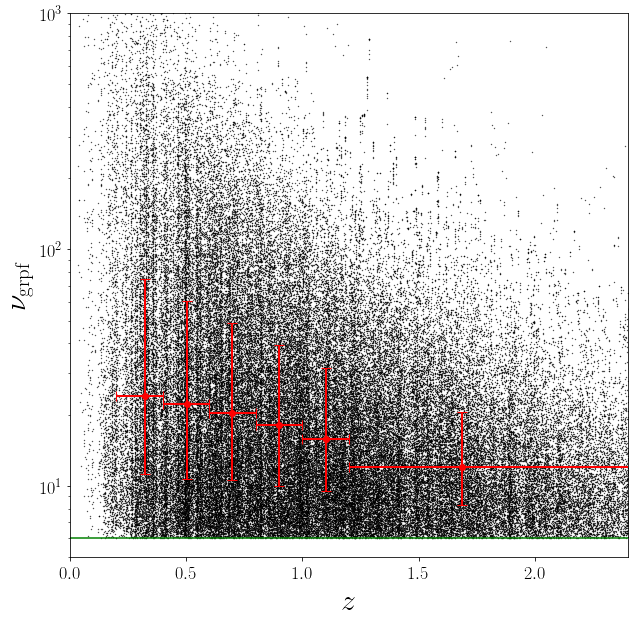

In [41]:
plt.rc('text',usetex=True)
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(scat[4]['z'],scat[4]['snr_grpf'], color='k', s=0.1)
ax.set_xlim(0,2.4)
ax.set_ylim(np.min(scat[4]['snr_grpf'])-1,10**3)
ax.set_yscale('log')

ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_xlabel('$z$',size=30)
ax.set_ylabel('$\\nu_{\\rm{grpf}}$',size=30)
ax.axhline(6,c='g')
#ax.set_title('\\rm{Not unrecognized blended and detectable lensing sample galaxies with zero shear }',size=16)

x, y , xerrs, yerrs = binning_helper(tomos,tomo_cats,'snr_grpf')
print(x, y , xerrs, yerrs)

ax.errorbar(x, y, xerr=xerrs, yerr=yerrs, color='red', fmt='o',capsize=5,ecolor='r', elinewidth=2)

<ErrorbarContainer object of 3 artists>

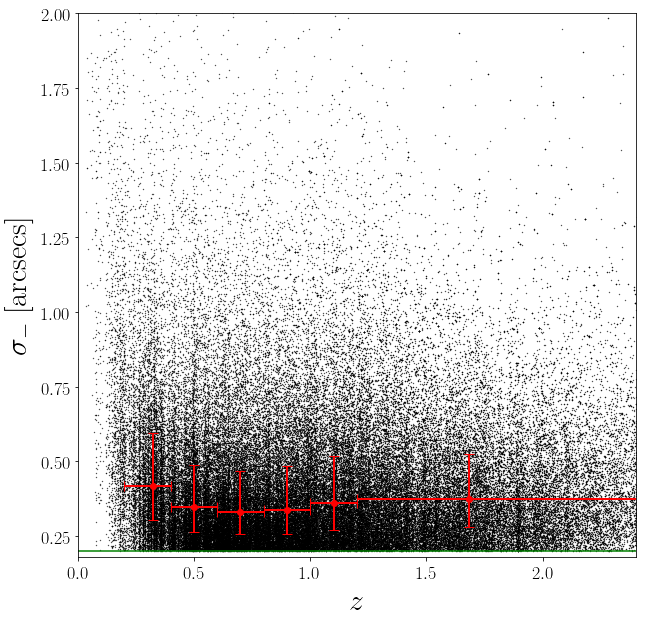

In [11]:
plt.rc('text',usetex=True)
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(scat[4]['z'],scat[4]['sigma_m'], s = 0.1, color='k')
ax.set_xlim(0,2.4)
ax.set_ylim(0.18,2)
ax.axhline(0.2, c = 'g')

ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_ylabel('$\\sigma_{-} \;\\rm{ [arcsecs]}$',size=30)
ax.set_xlabel('$z$',size=30)
# ax.set_title('\\rm{Not unrecognized blends and detectable lensing sample galaxies with zero shear }',size=16)

x, y , xerrs, yerrs = binning_helper(tomos,tomo_cats,'sigma_m')

ax.errorbar(x, y, xerr=xerrs, yerr=yerrs, color='red', fmt='o',capsize=5,ecolor='r', elinewidth=2)

## Are the median of size increasing because of a selection effect? 

In [19]:
main_tomo_cats = tomo_fncs.get_tomographic_cats(main_catsLSST, tomos)

<ErrorbarContainer object of 3 artists>

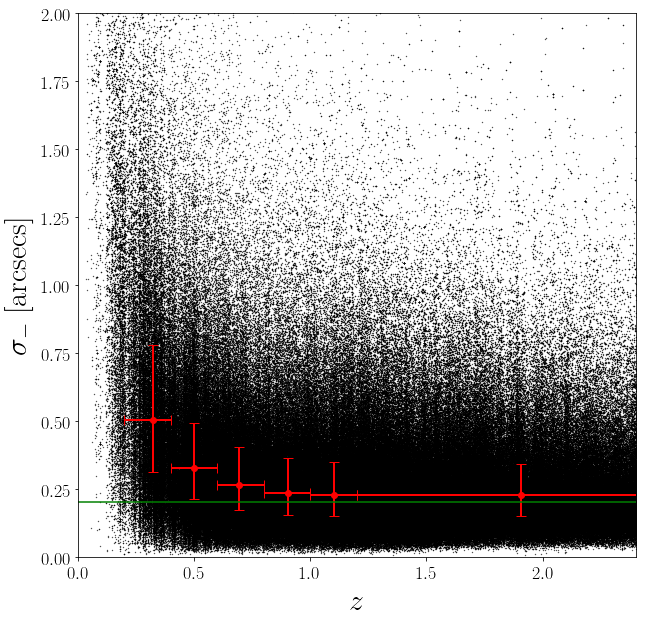

In [17]:
plt.rc('text',usetex=True)
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(main_catsLSST[4]['z'],main_catsLSST[4]['sigma_m'], s = 0.1, color='k')
ax.set_xlim(0,2.4)
ax.set_ylim(0,2)
ax.axhline(0.2, c = 'g')

ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_ylabel('$\\sigma_{-} \;\\rm{ [arcsecs]}$',size=30)
ax.set_xlabel('$z$',size=30)
# ax.set_title('\\rm{Not unrecognized blends and detectable lensing sample galaxies with zero shear }',size=16)

x, y , xerrs, yerrs = binning_helper(tomos,main_tomo_cats,'sigma_m')

ax.errorbar(x, y, xerr=xerrs, yerr=yerrs, color='red', fmt='o',capsize=5,ecolor='r', elinewidth=2)

## Ellipticity as a function fo redshift. 

<ErrorbarContainer object of 3 artists>

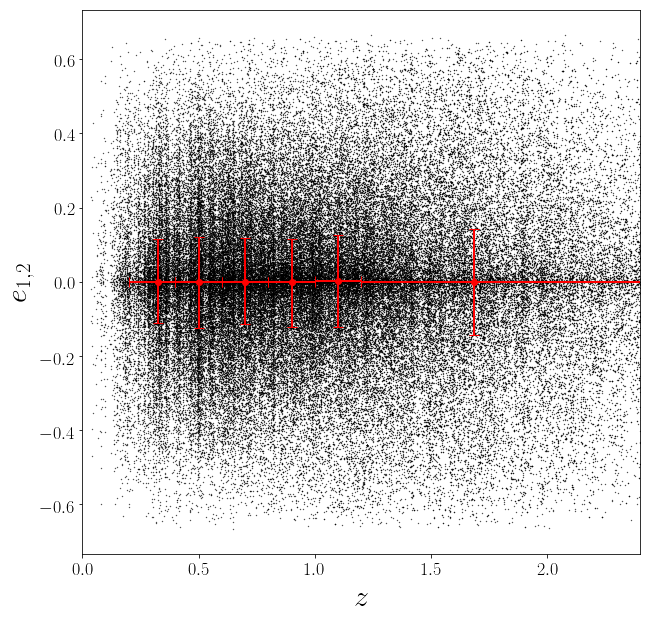

In [13]:
plt.rc('text',usetex=True)
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(scat[4]['z'],scat[4]['e1'], s = 0.1, color='k')
ax.set_xlim(0,2.4)
# ax.set_ylim(0.18,2)
# ax.axhline(0.2, c = 'g')

ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_ylabel('$e_{1,2}$',size=30)
ax.set_xlabel('$z$',size=30)
# ax.set_title('\\rm{Not unrecognized blends and detectable lensing sample galaxies with zero shear }',size=16)

x, y , xerrs, yerrs = binning_helper(tomos,tomo_cats,'e1')

ax.errorbar(x, y, xerr=xerrs, yerr=yerrs, color='red', fmt='o',capsize=5,ecolor='r', elinewidth=2)

## Individual distribution of sigma- 

In [14]:
len(tomo_cats)

6

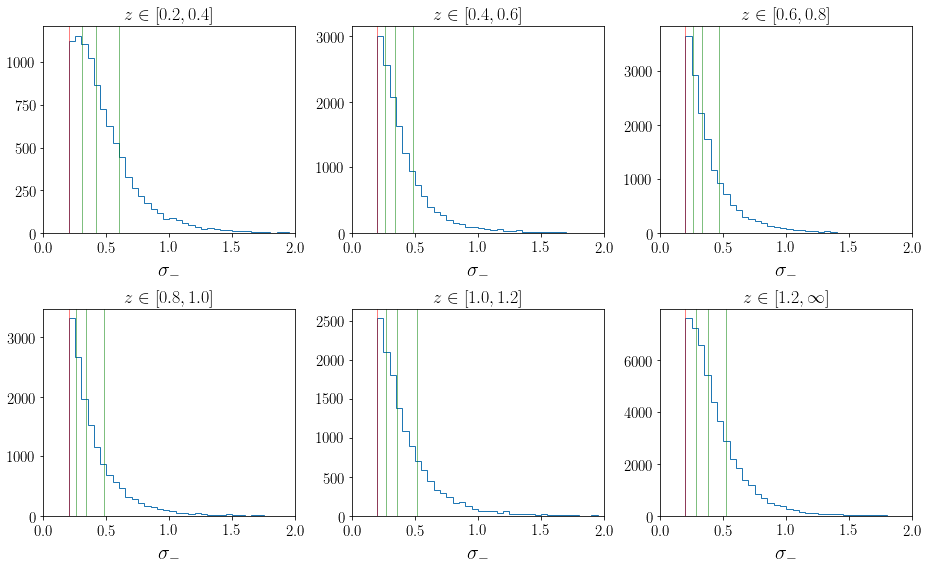

In [11]:
plt.rc('text',usetex=True)
fig3, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 8))
bins =['$z \\in [0.2,0.4]$','$z \\in [0.4,0.6]$','$z \\in [0.6,0.8]$','$z \\in [0.8,1.0]$','$z \\in [1.0,1.2]$','$z \\in [1.2, \\infty]$', '$z \\in [1.2,+\\infty]$']
for ax,cats,bin_text in zip(axes.flatten(),tomo_cats,bins ): 
    ax.hist(cats[4]['sigma_m'], range=[0,2.4], bins=np.arange(0, 2.4 + .05, .05),  histtype='step')
    #ax.hist(cats[4]['sigma_m'], histtype='step', bins = 50)
    ax.set_xlim(0,2.0) 
    ax.set_title(bin_text, size=18)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_xticks(np.linspace(0,2.0,5))
    ax.axvline(0.2,c='r', linewidth=0.5)
    ax.axvline(np.percentile(cats[4]['sigma_m'], 25),c='g', linewidth=0.5)
    ax.axvline(np.percentile(cats[4]['sigma_m'], 50),c='g', linewidth=0.5)
    ax.axvline(np.percentile(cats[4]['sigma_m'], 75),c='g', linewidth=0.5)
    ax.set_xlabel('$\\sigma_{-}$', size=20)
plt.tight_layout()

In [15]:
main_tomo_cats = tomo_fncs.get_tomographic_cats(main_catsLSST, tomos)

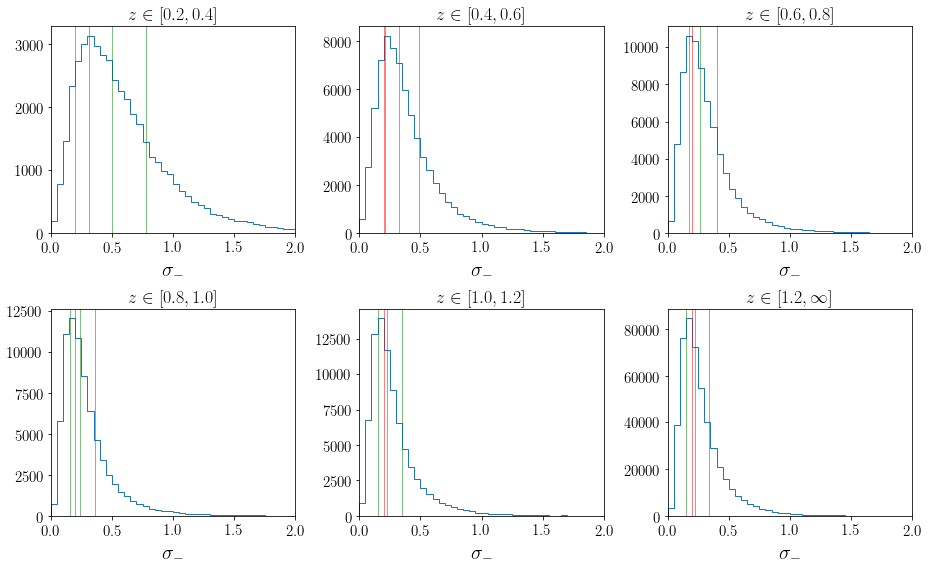

In [24]:
plt.rc('text',usetex=True)
fig3, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 8))
bins =['$z \\in [0.2,0.4]$','$z \\in [0.4,0.6]$','$z \\in [0.6,0.8]$','$z \\in [0.8,1.0]$','$z \\in [1.0,1.2]$','$z \\in [1.2, \\infty]$', '$z \\in [1.2,+\\infty]$']
for ax,cats,bin_text in zip(axes.flatten(),main_tomo_cats,bins ): 
    ax.hist(cats[4]['sigma_m'], range=[0,2.4], bins=np.arange(0, 2.4 + .05, .05),  histtype='step')
    #ax.hist(cats[4]['sigma_m'], range=[0,2.4], histtype='step', bins = 50)
    #ax.hist(cats[4]['sigma_m'], histtype='step', bins = 50)
    ax.set_xlim(0,2.0)
    ax.set_title(bin_text, size=18)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_xticks(np.linspace(0,2.0,5))
    ax.axvline(np.percentile(cats[4]['sigma_m'], 25),c='g', linewidth=0.5)
    ax.axvline(np.percentile(cats[4]['sigma_m'], 50),c='g', linewidth=0.5)
    ax.axvline(np.percentile(cats[4]['sigma_m'], 75),c='g', linewidth=0.5)
    ax.axvline(0.2,c='r', linewidth=0.5)
    ax.set_xlabel('$\\sigma_{-}$', size=20)
plt.tight_layout()

## What happens using the (wrong) parametrization in the SRD


zmax: 1.101
m0 (blending off): 0.001118
m0 (blending on): 0.00261


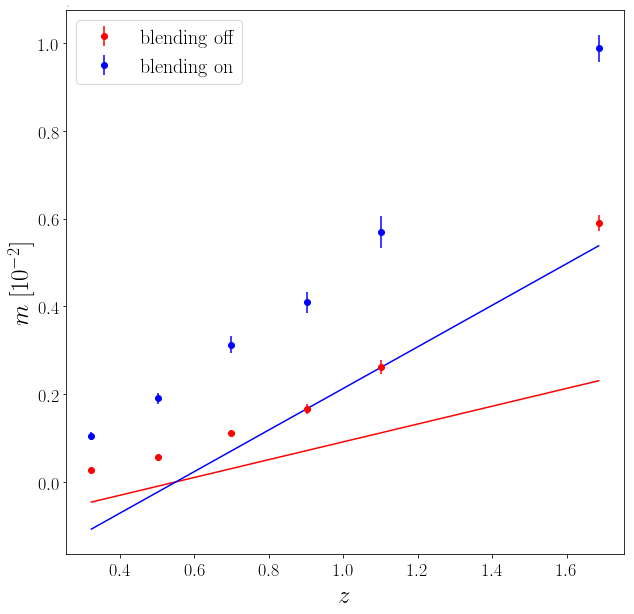

In [36]:
plt.rc('text',usetex=True)

fig,ax = plt.subplots(figsize=(10,10))
#x = [0.3,0.5,0.7,0.9,1.1, 1.3] #middle of each bin (except for the last one).
x = [np.median(tomo_cats[i][4]['z']) for i in range(len(tomo_cats))]
ax.errorbar(x, tomo_ms_iso, yerr= tomo_ms_errs_iso,  color='r', marker='o',linestyle=' ', label= '\\rm{blending off}')
ax.errorbar(x, tomo_ms_grp, yerr=tomo_ms_errs_grp, color='b' , marker='o',linestyle= ' ', label='\\rm{blending on}')
plt.legend(loc=2, prop={'size':20}) 

#do fit and draw the line. 
#drop the last 'overflow' bin for fitting purposes.  
beta0_iso,beta0_err_iso = semi_glinear_fit(x[:-1],tomo_ms_iso[:-1],tomo_ms_errs_iso[:-1])
beta0_grp,beta0_err_grp = semi_glinear_fit(x[:-1],tomo_ms_grp[:-1],tomo_ms_errs_grp[:-1])

zmax = np.median(tomo_cats[-2][4]['z'])
b_iso = - zmax * beta0_iso / 2 
b_grp = - zmax * beta0_grp / 2 



y_line_iso= errors.get_line(x,beta0_iso,b_iso)
y_line_grp= errors.get_line(x,beta0_grp,b_grp)


ax.plot(x,y_line_iso, color='red')
ax.plot(x,y_line_grp, color='blue')


ax.set_xlabel('$z$', size=25)
ax.set_ylabel('$m \\; [10^{-2}]$', size=25)
ax.tick_params(axis='both', which='major', labelsize=18)

ax.ticklabel_format(style='sci', axis='y', scilimits=(-0, 0))
ax.get_yaxis().get_offset_text().set_size(1)

m0_iso = zmax * beta0_iso / 2 
m0_grp = zmax * beta0_grp / 2
m_avg_iso = beta1_iso + m0_iso
m_avg_grp = beta1_grp + m0_grp



print()
print(f"zmax: {zmax:.4g}")
print(f"m0 (blending off): {m0_iso:.4g}")
print(f"m0 (blending on): {m0_grp:.4g}")




## Add one more point for [0, 0.2] 

In [90]:
first_tomocats = [down_cut(up_cut(scat, 'z', 0), 'z', 0.2) for scat in scats] 

In [92]:
first_boot_matrix = get_boostrap_covariance_matrix(first_tomocats, 'g1', 10000)

In [ ]:
first_tomo_errors = 

## Create final plot 

In [21]:
g1s = [-0.015, -.01, -.005, 0, 0.005, 0.010, 0.015]

In [9]:
fscats = scats[1:-1] #don't fit to |g| = 0.02 

In [10]:
tomos = np.linspace(0.0, 1.2, 7)
print(tomos)

[0.  0.2 0.4 0.6 0.8 1.  1.2]


In [11]:
ftomo_cats = tomo_fncs.get_tomographic_cats(fscats, tomos)

In [12]:
#matrices = tomo_fncs.get_tomo_bootstrap_matrices(ftomo_cats,int(1e4)) 

In [16]:
#matrices = pickle.load(open('mycode/new_tomo_matrices.p','rb'), encoding='latin1')

7

In [18]:
tomo_errs_iso = [] 
tomo_errs_grp = [] 
for mat in matrices: 
    tomo_errs_iso.append(np.sqrt(np.diag(np.array(mat[0]))))
    tomo_errs_grp.append(np.sqrt(np.diag(np.array(mat[1]))))

In [ ]:
# project_dir = 'maycode/tomo/project1'

# tomo_cats = pickle.load(open('mycode/tomo/project1/tomo_cats.p','rb'), encoding='latin1')

# #load original results 
# tomo_errs, tomo_bootstrap_matrices, tomo_ms = tomo_fncs.load_tomos(project_dir)

# tomo_ms_iso, tomo_ms_errs_iso, tomo_ms_grp, tomo_ms_errs_grp = tomo_ms 

In [22]:
(tomo_ms_iso, tomo_ms_errs_iso, tomo_ms_grp, tomo_ms_errs_grp) = tomo_fncs.get_tomo_multp_bias(g1s, ftomo_cats, (tomo_errs_iso,tomo_errs_grp), matrices)

7

In [24]:
import scipy.odr

def glinear_fit(x,y,yerrs):
    linear = scipy.odr.Model(errors.linear_f_odr)
    mydata = scipy.odr.RealData(x, y, sy=yerrs)
    myodr = scipy.odr.ODR(mydata, linear,beta0=[1.,2.])
    myoutput = myodr.run()
    #myoutput.pprint()
    beta0 = myoutput.beta[0]
    beta1 = myoutput.beta[1]
    real_cov_matrix = myoutput.cov_beta* myoutput.res_var
    
    #return beta0, beta1, np.sqrt(myoutput.cov_beta[0,0]), np.sqrt(myoutput.cov_beta[1,1]), myoutput.cov_beta[0,1]/np.sqrt(myoutput.cov_beta[0,0]*myoutput.cov_beta[1,1])
    return beta0, beta1, myoutput.sd_beta[0], myoutput.sd_beta[1], real_cov_matrix[0,1]


zmax: 1.1
m0 (blending off): 0.00156
m0 err (blending off): 0.000171
m_avg (blending off): 0.000819
m_avg err (blending off): 0.000274
correlation (blending off): -0.20332271732292218

m0 (blending on): 0.00302
m0 err (blending on): 0.000133
m_avg (blending on): 0.00221
m_avg err (blending on): 0.000214
correlation (blending on): -0.19911972749911402


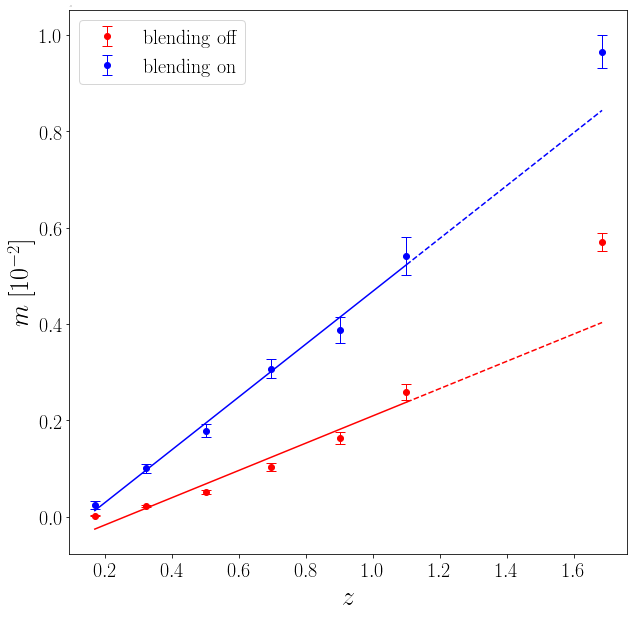

In [35]:
### in this new version (November 2, 2018) - we ignore the last point in the fit per Pat's suggestion
#and make this explicit in the plot by not plotting anything beyond that point. 
plt.rc('text',usetex=True)

fig,ax = plt.subplots(figsize=(10,10))
x = [np.median(ftomo_cats[i][4]['z']) for i in range(len(ftomo_cats))] #same across shears. 
ax.errorbar(x, tomo_ms_iso, yerr= tomo_ms_errs_iso,  color='r', fmt='o',linestyle=' ', label= '\\rm{blending off}', capsize=5, elinewidth=1, markeredgewidth=1)
ax.errorbar(x, tomo_ms_grp, yerr=tomo_ms_errs_grp, color='b' , fmt='o',linestyle= ' ', label='\\rm{blending on}', capsize=5, elinewidth=1, markeredgewidth=1)
plt.legend(loc=2, prop={'size':20}) 

zmax = np.median(ftomo_cats[-2][4]['z'])

#do fit and draw the line. 
#drop the last 'overflow' bin for fitting purposes.  
beta0_iso, beta1_iso,beta0_err_iso,beta1_err_iso,beta01_cov_iso = glinear_fit(x[:-1],tomo_ms_iso[:-1],tomo_ms_errs_iso[:-1])
beta0_grp, beta1_grp,beta0_err_grp,beta1_err_grp,beta01_cov_grp = glinear_fit(x[:-1],tomo_ms_grp[:-1],tomo_ms_errs_grp[:-1])

y_line_iso= errors.get_line(x,beta0_iso,beta1_iso)
y_line_grp= errors.get_line(x,beta0_grp,beta1_grp)

#do not plot it all the way to the last bin.
ax.plot(x[:-1],y_line_iso[:-1], color='red')
ax.plot(x[:-1],y_line_grp[:-1], color='blue')

#plot the last bin dashed 
ax.plot(x[-2:],y_line_iso[-2:], color='red', linestyle='dashed')
ax.plot(x[-2:],y_line_grp[-2:], color='blue', linestyle='dashed')


ax.set_xlabel('$z$', size=26)
ax.set_ylabel('$m \\; [10^{-2}]$', size=26)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.ticklabel_format(style='sci', axis='y', scilimits=(-0, 0))
ax.get_yaxis().get_offset_text().set_size(1)

m0_iso = zmax * beta0_iso / 2
m0_err_iso = beta0_err_iso * zmax /2 
m0_grp = zmax * beta0_grp / 2
m0_err_grp = beta0_err_grp * zmax /2 


m_avg_iso = beta1_iso + m0_iso
m_avg_iso_err = np.sqrt(beta1_err_iso**2 + m0_err_iso**2)
m_avg_grp = beta1_grp + m0_grp
m_avg_grp_err = np.sqrt(beta1_err_grp**2 + m0_err_grp**2)

corr_iso = ((zmax/2) * beta01_cov_iso + (zmax/2)**2 * beta0_err_iso**2) / np.sqrt(((zmax**2 /4)*beta0_err_iso**2) *(beta1_err_iso**2 + zmax*beta01_cov_iso + (zmax**2/4) * beta0_err_iso**2) )
corr_grp = ((zmax/2) * beta01_cov_grp + (zmax/2)**2 * beta0_err_grp**2) / np.sqrt(((zmax**2 /4)*beta0_err_grp**2) *(beta1_err_grp**2 + zmax*beta01_cov_grp + (zmax**2/4) * beta0_err_grp**2) )






print()
print(f"zmax: {zmax:.3g}")
print(f"m0 (blending off): {m0_iso:.3g}")
print(f"m0 err (blending off): {m0_err_iso:.3g}")
print(f"m_avg (blending off): {m_avg_iso:.3g}")
print(f"m_avg err (blending off): {m_avg_iso_err:.3g}")
print(f"correlation (blending off): {corr_iso}")
print()

print(f"m0 (blending on): {m0_grp:.3g}")
print(f"m0 err (blending on): {m0_err_grp:.3g}")
print(f"m_avg (blending on): {m_avg_grp:.3g}")
print(f"m_avg err (blending on): {m_avg_grp_err:.3g}")
print(f"correlation (blending on): {corr_grp}")








# Medians of ellipticity distributions 

## ellipticity distribution  of selected samples 

median of ellipticity distribution of selected sample: 2.83997e-05
standard deviation of ellipticity distribution of selected sample: 0.2252



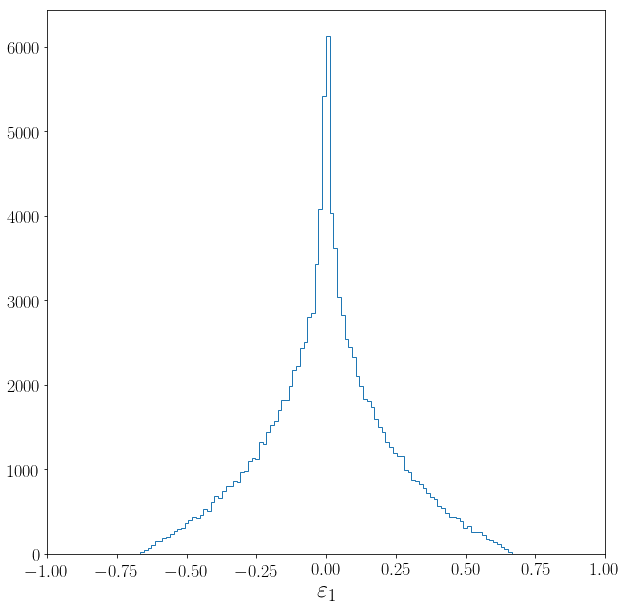

In [23]:
#note clearly distribution is the same for all applied shears
plt.rc('text', usetex=True)
md = np.median(scats[4]['e1'])
std1 = np.std(scats[4]['e1'])
             
fig, ax = plt.subplots(figsize=(10, 10))


plt.hist(scats[4]['e1'], histtype='step', bins = 100 , label = 'e1')
#plt.hist(scats[4]['e2'], histtype='step', bins = 100, label = 'e2' ) 
print(f"median of ellipticity distribution of selected sample: {md:.6g}" )
print(f"standard deviation of ellipticity distribution of selected sample: {std1:.4g}" )
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_xlabel('$\\varepsilon_{1}$', size=24)
plt.xlim(-1,1)
print()

median of ellipticity distribution of selected sample: -3.8002e-05
standard deviation of ellipticity distribution of selected sample: 0.2252



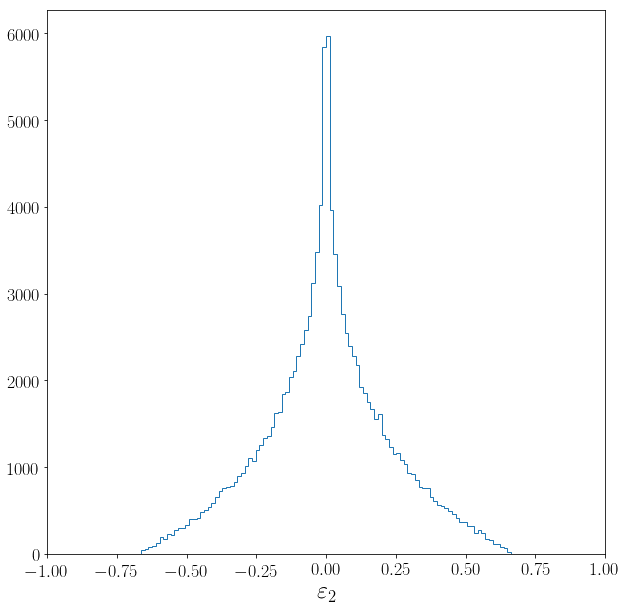

In [24]:
#note clearly distribution is the same for all applied shears
plt.rc('text', usetex=True)
md = np.median(scats[4]['e2'])
std2 = np.std(scats[4]['e2'])
             
fig, ax = plt.subplots(figsize=(10, 10))


plt.hist(scats[4]['e2'], histtype='step', bins = 100 , label = 'e2')
#plt.hist(scats[4]['e2'], histtype='step', bins = 100, label = 'e2' ) 
print(f"median of ellipticity distribution of selected sample: {md:.5g}" )
print(f"standard deviation of ellipticity distribution of selected sample: {std1:.4g}" )
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_xlabel('$\\varepsilon_{2}$', size=24)
plt.xlim(-1,1)
print()

In [35]:
print(std1**2)

0.050694946650794215


In [26]:
std1**2 - std2**2 

0.0001910657114396752

In [21]:
np.median(np.array(scats[4]['e1'])*np.array(scats[4]['e2']) )

7.690517e-08

In [39]:
np.random.choice([1,2,3], 10)

array([3, 2, 2, 3, 1, 3, 3, 3, 2, 2])

In [43]:
print(length)

118946


In [44]:
e1_meds1 = [] 
N = 10000
length = len(scats[4]['e1'])
for i in range(N): 
    if i%1000 == 0: 
        print(i)
        
    e1_meds1.append(np.median(np.random.choice(scats[4]['e1'], length)))

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [42]:
e1_stds1 = [] 
N = 10000
length = len(scats[4]['e1'])
for i in range(N): 
    if i%50 == 0: 
        print(i)
        
    e1_stds1.append(np.std(np.random.choice(scats[4]['e1'], length)))

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
4950
5000
5050
5100
5150
5200
5250
5300
5350
5400
5450
5500
5550
5600
5650
5700
5750
5800
5850
5900
5950
6000
6050
6100
6150
6200
6250
6300
6350
6400
6450
6500
6550
6600
6650
6700
6750
6800
6850
6900
6950
7000
7050
7100
7150
7200
7250
7300
7350
7400
7450
7500
7550
7600
7650
7700
7750
7800
7850
7900
7950
8000
8050
8100
8150
8200
8250
8300
8350
8400
8450
8500
8550
8600
8650
8700
8750
8800
8850
8900
8950
9000
9050
9100
9150
9200
9250
9300
9350
9400
9450
9500
9550
9600
9650
9700
9750
9800
9850
9900
9950


In [49]:
e1_vars

array([0.05094588, 0.05091611, 0.05098117, ..., 0.05063807, 0.05082303,
       0.05039315], dtype=float32)

In [47]:
e1_meds = np.array(e1_meds1)
e1_vars = np.array(e1_stds1)**2  

median of stds of boostrapped samples: 0.05069
std of vars of boostrapped samples: 0.0002189


Text(0.5, 0, '$\\rm{var}(\\varepsilon_{1})$')

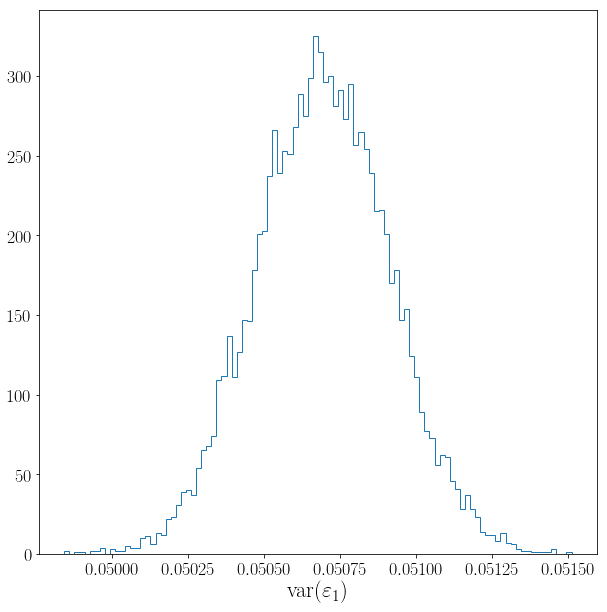

In [50]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.rc('text', usetex=True)

plt.hist(e1_vars, histtype='step', bins = 100 , label = 'e1')
print(f"median of stds of boostrapped samples: {np.median(e1_vars):.4g}" )
print(f"std of vars of boostrapped samples: {np.std(e1_vars):.4g}" )
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_xlabel('$\\rm{var}(\\varepsilon_{1})$', size=22)



median of stds of boostrapped samples: 2.786e-05
std of vars of boostrapped samples: 0.0001782


Text(0.5, 0, '$\\rm{med}(\\varepsilon_{1})$')

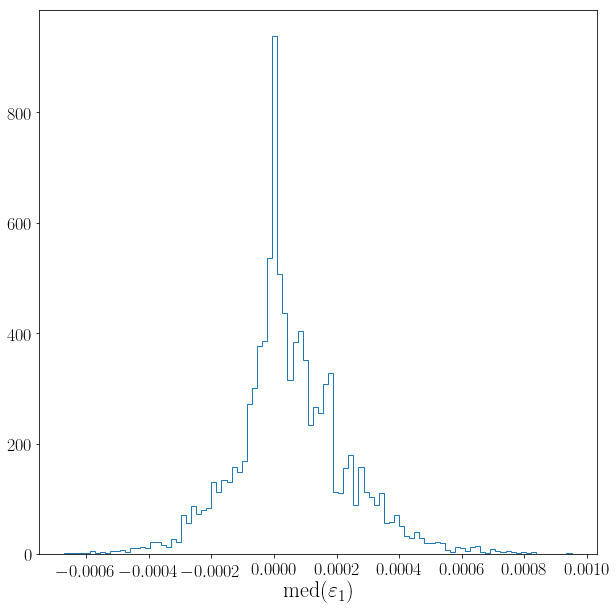

In [51]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.rc('text', usetex=True)

plt.hist(e1_meds, histtype='step', bins = 100 , label = 'e1')
print(f"median of stds of boostrapped samples: {np.median(e1_meds):.4g}" )
print(f"std of vars of boostrapped samples: {np.std(e1_meds):.4g}" )
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_xlabel('$\\rm{med}(\\varepsilon_{1})$', size=22)




In [9]:
scats[4]

db_id,grp_id,grp_size,grp_rank,visible,xmin,xmax,ymin,ymax,f_disk,f_bulge,dx,dy,z,ab_mag,ri_color,flux,sigma_m,sigma_p,e1,e2,a,b,beta,psf_sigm,purity,snr_sky,snr_iso,snr_grp,snr_isof,snr_grpf,ds,dg1,dg2,ds_grp,dg1_grp,dg2_grp,hsm_sigm,hsm_e1,hsm_e2,g1_fit,g2_fit,bias_f,bias_s,bias_g1,bias_g2,bias_x,bias_y,bias_f_grp,bias_s_grp,bias_g1_grp,bias_g2_grp,bias_x_grp,bias_y_grp,match,ambig_blend
int64,int64,int16,int16,int16,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,bool
402701771027,402701771027,1,0,1,1528,1546,1136,1153,0.98696816,0.01303185,-1492.4906,-1570.9366,0.9377821,24.244675,0.5533581,142586.27,0.30176535,0.305207,0.020416385,0.10451396,0.33580965,0.27117246,0.68893987,0.6893168,1.0,38.46108,38.168285,38.168285,25.260859,25.260859,0.0870765,0.078514844,0.08103434,0.0870765,0.078514844,0.08103434,0.43768406,0.040261574,0.20631541,0.0,0.0,250.29305,-0.00906925,0.00063121837,0.0032322488,4.5878306e-08,1.564938e-07,250.29305,-0.00906925,0.00063121837,0.0032322488,4.5878306e-08,1.564938e-07,2374,False
402701802864,402701802864,2,0,1,1472,1492,1149,1165,0.96989685,0.03010317,-1503.4873,-1568.5226,1.3208928,24.01268,0.44771576,176553.19,0.23358858,0.37006557,0.6530426,0.06096216,0.512404,0.10648555,0.046540603,0.70988816,0.99749994,50.32864,49.799507,49.799244,33.389637,29.453005,0.30935177,0.3042709,0.06465121,0.31317917,0.30808738,0.06908415,0.41501203,0.95491993,0.08994928,0.0,0.0,147.33209,-0.13175015,0.1748913,0.01632177,-1.0962722e-07,-5.0485223e-08,-1139.6946,-0.14806202,0.17132358,0.02313392,0.0036908567,-0.00056244485,2373,False
402701209559,402701209559,3,0,1,1578,1608,1203,1225,0.8316719,0.16832809,-1481.2999,-1557.1577,1.3187922,23.731413,0.749424,228761.23,0.6078556,0.64679885,0.23213664,-0.0901711,0.7839308,0.4713279,-0.18525055,0.88110834,0.999517,44.25199,43.95287,43.952866,25.301476,25.14981,0.05813826,0.04676153,0.04240929,0.058484226,0.046824757,0.042660046,0.57146764,0.41827914,-0.16246456,0.0,0.0,322.16357,-0.0016656923,0.0015180679,-0.00058941066,-4.1353854e-08,8.546046e-08,162.37302,-0.0027242198,0.0014375887,1.2527349e-05,9.9136414e-05,-6.8708505e-05,2304,False
402700997880,402700997880,4,0,1,1500,1519,1215,1235,1.0,0.0,-1498.014,-1554.8732,0.4198187,23.395298,0.3135891,311765.75,0.21473512,0.23310722,-0.1499395,0.24377753,0.28824922,0.1599698,1.0611105,0.6601537,0.99869734,92.553856,90.732864,90.73198,62.76119,48.605976,0.061634813,0.04916974,0.056034,0.07315416,0.060493927,0.05907962,0.40076756,-0.28419623,0.46203887,0.0,0.0,101.62529,-0.00575589,-0.002679396,0.0043565086,-5.349163e-09,3.3322578e-09,-1923.9637,-0.017604847,-0.0149254855,-0.007564748,-0.003109634,-0.0018869571,2237,False
402703238052,402703238052,1,0,1,1539,1557,1241,1255,0.9820692,0.017930802,-1490.3148,-1550.2701,1.2197366,25.02423,0.5214138,69543.41,0.28362587,0.3600707,0.3946622,0.28010115,0.48096544,0.16725451,0.3086111,0.7084249,1.0,18.980677,18.907854,18.907854,12.60419,12.60419,0.3120734,0.25833172,0.20795546,0.3120734,0.25833172,0.20795546,0.43277198,0.65426505,0.46429753,0.0,0.0,538.3042,-0.12989789,0.12916058,0.091669634,-2.7481803e-07,-1.6135069e-06,538.3042,-0.12989789,0.12916058,0.091669634,-2.7481803e-07,-1.6135069e-06,2249,False
402700644096,402700147634,9,1,1,1777,1798,1398,1423,0.9956777,0.0043223104,-1442.4177,-1517.7899,1.4100884,22.934774,0.26293945,476472.5,0.3085574,0.34691054,-0.28497627,-0.18818715,0.44040883,0.21618019,-1.2789842,0.70522314,0.99997586,127.100586,124.02948,124.02948,83.30769,83.307686,0.03194434,0.02773556,0.024199123,0.031944342,0.027735563,0.024199123,0.44250545,-0.516625,-0.34116897,0.0,0.0,76.96145,-0.0012769772,-0.0010616712,-0.00070112426,9.879544e-1

(-1, 1)

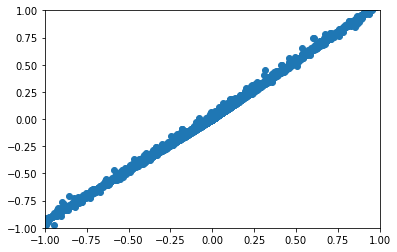

In [16]:
plt.scatter(scats[4]['bias_g1'], scats[8]['bias_g1'])
plt.xlim(-1,1)
plt.ylim(-1,1)

In [13]:
np.mean(scats[4]['bias_g1'])

-0.00050333404

In [15]:
np.median(scats[8]['bias_g1'])

3.8534974e-05

# How bad is the problem 

In [16]:
print("Number dropped total:")
print(sum(main_catsLSST_ss1[4]['snr_grp'] == 0))
print(sum(main_catsLSST[4]['snr_grp'] == 0))

1321
1047


In [17]:
cat = main_catsLSST[4]

In [18]:
grps = np.sort(list(set(cat['grp_id'])))

In [ ]:
grp_sizes = [cat[cat['grp_id']==i]['grp_size'][0] for i in grps]

In [ ]:
dropped = [sum(cat[cat['grp_id']==i]['snr_grpf']==0) for i in grps]